Dictionaire des Données (Data Dictionary)
• Âge : l'âge de l'employé											
• Attrition (colonne cible) : indicateur indiquant si l'employé a quitté l'entreprise ou non											
• Voyage_affaires : fréquence à laquelle l'employé a voyagé pour le compte de l'entreprise											
• DailyRate : montant que l'employé coûte à l'entreprise en tant que taux horaire											
• Département : Dans quel département travaille l'employé											
• DistanceFromHome : la distance entre le domicile de l'employé et le bureau											
• Formation : 1 « Inférieur au collège » 2 « Collège » 3 « Licence » 4 « Master » 5 « Docteur »											
• EducationField : Dans quelle industrie l'employé a une formation											
• EmployeeCount : un nombre d'employés											
• EmployeeNumber : un numéro d'identification unique attribué à chaque employé											
• EnvironmentSatisfaction : une indication de la satisfaction d'un employé avec son environnement sur une échelle de 1 à 4, 1 étant « Faible », 2 « Moyen », 3 « Élevé » et 4 « Très élevé ».											
• Genre : le sexe de l'employé											
• HourlyRate : montant qu'un employé gagne en taux horaire											
• Implication_dans_emploi : degré d'implication d'un employé dans son travail sur une échelle allant de 1 à 5. Où 1 est très peu impliqué et 5 est très impliqué.											
• JobLevel : une indication du niveau de classement du poste d'un employé, allant de 1 à 5. 1 étant un poste de bas niveau (par exemple un poste junior) et 5 un niveau de poste de haut niveau (par exemple un PDG)											
• JobRole : l'intitulé du poste de l'employé											
• Satisfaction_travail : une indication du degré de satisfaction d'un employé par rapport à son travail sur une échelle allant de 1 à 4, 1 étant « Faible », 2 « Moyen », 3 « Élevé » et 4 « Très élevé ».											
• État_civil : l'état de la relation de l'employé											
• Revenu_mensuel : combien gagne l'employé sur une base mensuelle											
• MonthlyRate : combien l'employé coûte à l'entreprise en tant que taux mensuel											
• NumCompaniesWorked : nombre d'entreprises pour lesquelles l'employé a travaillé auparavant											
• Over18_Index: si l'employé a plus de 18 ans ou non											
• Heures_supplémentaires : si l'employé a effectué des heures supplémentaires ou non											
• PercentSalaryHike : pourcentage d'augmentation de salaire de l'employé											
• Évaluation_performance : 1 « Faible » 2 « Bon » 3 « Excellent » 4 « Exceptionnel »											
• Satisfaction_relationnelle : 1 « Faible » 2 « Moyen » 3 « Élevée » 4 « Très élevée »											
• StandardHours : le nombre d'heures que l'employé travaille habituellement sur 2 semaines											
• StockOptionLevel : quel niveau d'option d'achat d'actions l'employé a dans l'entreprise											
• TotalWorkingYears : depuis combien d'années l'employé a travaillé											
• TrainingTimesLastYear : combien de temps l'employé a passé en formation l'année dernière											
• WorkLifeBalance : un indicateur de l'équilibre entre vie professionnelle et vie privée de l'employé, 1 étant « Mauvais », 2 « Bon », 3 « Excellent » et 4 « Très élevé ».											
• YearsAtCompany : depuis combien d'années l'employé travaille dans l'entreprise											
• YearsInCurrentRole : depuis combien d'années l'employé occupe son poste actuel											
• YearsSinceLastPromotion : depuis combien d'années se sont écoulées depuis la dernière promotion des employés											
• YearsWithCurrManager : depuis combien d'années l'employé travaille avec son manager actuel.											
											

Pour predire la probabilités  de demissions  d'un employé, nous sommes dans le cadre d'une methode "Supervised Learning" ---> Apprentissage supervisé: La viariable réponse "Attrition" étant bien étiquetée

La variable "Attrition" étant catégorielle, alors, l'apprentisage supervisé dont il est question ici est une CLASSIFICATION (et non une regression)

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
pd.set_option("display.max_row",45)

In [181]:
pd.set_option("display.max_columns", 45)

In [182]:
data = pd.read_excel("Exam_ML_ISE-2.xlsx",sheet_name=2)

In [183]:
data.head()

Age Attrition    Voyage_affaires  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0          2  Life Sciences              1               1   
1               8.0          1  Life Sciences              1               2   
2               2.0          2          Other              1               4   
3               3.0          4  Life Sciences              1               5   
4               2.0          1        Medical              1               7   

   EnvironmentSatisfaction  Genre   HourlyRate  Implication_dans_emploi  \
0                        2  Female          94                        3   
1                        3    Male          61                        2   
2                        4    Male          92                        2   
3                        4  Female          56                        3   
4                        1    Male          40                        3   

   JobLevel                JobRole  Satisfaction_travail État_civil  \
0         2        Sales Executive                     4     Single   
1         2     Research Scientist                     2    Married   
2         1  Laboratory Technician                     3     Single   
3         1     Research Scientist                     3    Married   
4         1  Laboratory Technician                     2    Married   

   Revenu_mensuel  MonthlyRate  NumCompaniesWorked Over18_Index  \
0            5993        19479                   8            Y   
1            5130        24907                   1            Y   
2            2090         2396                   6            Y   
3            2909        23159                   1            Y   
4            3468        16632                   9            Y   

  Heures_supplémentaires  PercentSalaryHike  Évaluation_performance  \
0                    Yes                 11                       3   
1                     No                 23                       4   
2                    Yes                 15                       3   
3                    Yes                 11                       3   
4                     No                 12                       3   

   Satisfaction_relationnelle  StandardHours  StockOptionLevel  \
0                           1             80                 0   
1                           4             80                 1   
2                           2             80                 0   
3                           3             80                 0   
4                           4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

# Preprocessing

Detection de doublons

In [184]:
duplicates=data.duplicated()

In [185]:
data[duplicates]

Empty DataFrame
Columns: [Age, Attrition, Voyage_affaires, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Genre , HourlyRate, Implication_dans_emploi, JobLevel, JobRole, Satisfaction_travail, État_civil, Revenu_mensuel, MonthlyRate, NumCompaniesWorked, Over18_Index, Heures_supplémentaires, PercentSalaryHike, Évaluation_performance, Satisfaction_relationnelle, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

Il n'y a donc pas de doublons dans la base de données

# Traitement de données manquantes

In [186]:
data.isna().sum()/data.shape[0]

Age                           0.000000
Attrition                     0.000000
Voyage_affaires               0.000000
DailyRate                     0.000000
Department                    0.000000
DistanceFromHome              0.010884
Education                     0.000000
EducationField                0.000000
EmployeeCount                 0.000000
EmployeeNumber                0.000000
EnvironmentSatisfaction       0.000000
Genre                         0.000000
HourlyRate                    0.000000
Implication_dans_emploi       0.000000
JobLevel                      0.000000
JobRole                       0.000000
Satisfaction_travail          0.000000
État_civil                    0.000000
Revenu_mensuel                0.000000
MonthlyRate                   0.000000
NumCompaniesWorked            0.000000
Over18_Index                  0.000000
Heures_supplémentaires        0.000000
PercentSalaryHike             0.000000
Évaluation_performance        0.000000
Satisfaction_relationnell

DistanceFromHome est la seule variable possedant des valeurs manquantes



Visualisation de la disposition des valeurs manquantees

<Axes: >

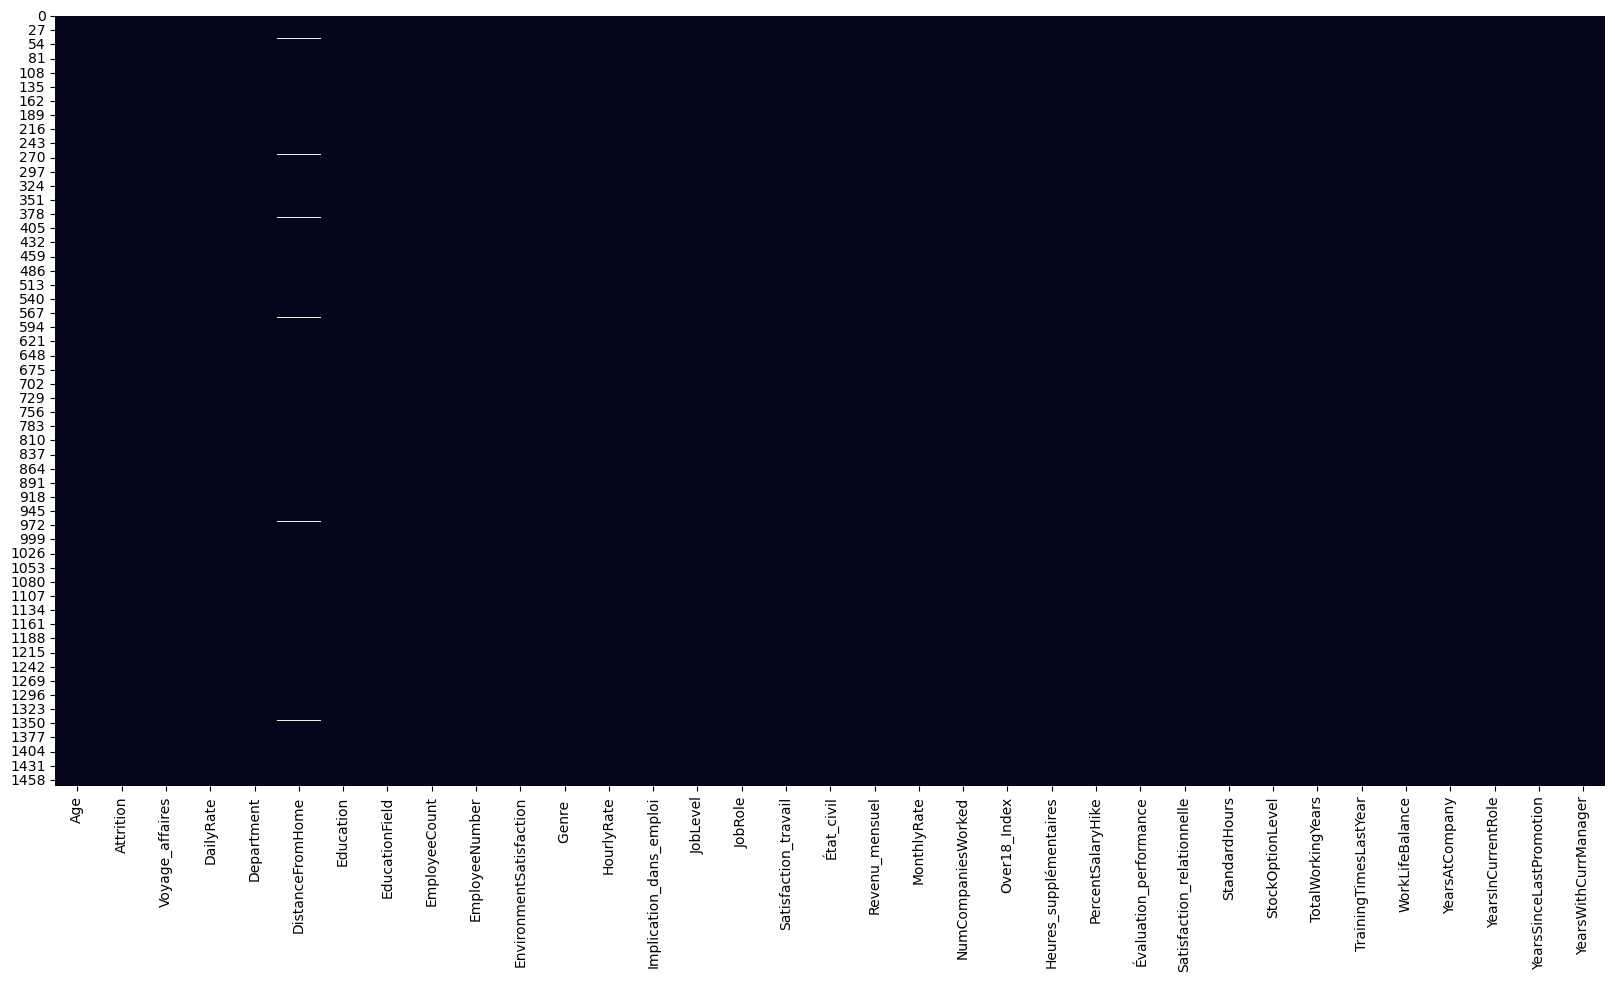

In [187]:

plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False)


Imputation des valeurs manquantes par la mediane de la DistanceFromHome

In [188]:
med = np.nanmedian(data['DistanceFromHome'])
#print(med)
#Imputation des Distances manquantes avec la Distance  median
data['DistanceFromHome'] =data['DistanceFromHome'].fillna(med)


In [189]:
data['DistanceFromHome']

0        1.0
1        8.0
2        2.0
3        3.0
4        2.0
        ... 
1465    23.0
1466     6.0
1467     4.0
1468     2.0
1469     8.0
Name: DistanceFromHome, Length: 1470, dtype: float64

In [190]:
data.isna().sum()

Age                           0
Attrition                     0
Voyage_affaires               0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Genre                         0
HourlyRate                    0
Implication_dans_emploi       0
JobLevel                      0
JobRole                       0
Satisfaction_travail          0
État_civil                    0
Revenu_mensuel                0
MonthlyRate                   0
NumCompaniesWorked            0
Over18_Index                  0
Heures_supplémentaires        0
PercentSalaryHike             0
Évaluation_performance        0
Satisfaction_relationnelle    0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [191]:
data["StockOptionLevel"].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [192]:
df1=data.copy()

#    Feature Enginering-Traitement des variables

### Nature des differentes variables

In [193]:
#Cherchons mainant a voire les differentes variables que nous avons dans notre base de donnees 
for col in df1:
    print(col)

Age
Attrition
Voyage_affaires
DailyRate
Department
DistanceFromHome
Education
EducationField
EmployeeCount
EmployeeNumber
EnvironmentSatisfaction
Genre 
HourlyRate
Implication_dans_emploi
JobLevel
JobRole
Satisfaction_travail
État_civil
Revenu_mensuel
MonthlyRate
NumCompaniesWorked
Over18_Index
Heures_supplémentaires
PercentSalaryHike
Évaluation_performance
Satisfaction_relationnelle
StandardHours
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [194]:
#variables categorielles nominales
for col in df1.select_dtypes("object"):
    print(f'{col:<50}{data[col].unique()}')
#ici on constate que la variable Over18_indexe n'a qu'une seule modalite. Elle doit alors etre supprime de la base car cela n'a pas de sens 


Attrition                                         ['Yes' 'No']
Voyage_affaires                                   ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department                                        ['Sales' 'Research & Development' 'Human Resources']
EducationField                                    ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Genre                                             ['Female' 'Male']
JobRole                                           ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
État_civil                                        ['Single' 'Married' 'Divorced']
Over18_Index                                      ['Y']
Heures_supplémentaires                            ['Yes' 'No']


Les variables Quantitatives:

Nous avons Constaté que la valeur maximale de chaque variable quantitative est supérieur à 5 à l'exception de la variable EmployeeNumber.Ainsi Ceci sera un moyen pour nous d'extraire les differentes variables quantitatives dans notre base de données

In [195]:
 
#tout d'abord ouvrons un tableau vide pour stoquer les variables quantitatives.
Quantitative=[]
for col in df1.select_dtypes("int64"):
    if df1[col].max()>5:
        Quantitative.append(col)
for col in df1.select_dtypes("float"):
    Quantitative.append(col)    
Quantitative.append("EmployeeCount")
print(Quantitative)



['Age', 'DailyRate', 'EmployeeNumber', 'HourlyRate', 'Revenu_mensuel', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome', 'EmployeeCount']


variables qualitatives(categorielles nominales +categorielles ordinal deja encodé)

In [196]:
Qualitative=[]
for col in df1.columns:
    if col not in Quantitative:
        Qualitative.append(col)      
print(Qualitative)

['Attrition', 'Voyage_affaires', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Genre\xa0', 'Implication_dans_emploi', 'JobLevel', 'JobRole', 'Satisfaction_travail', 'État_civil', 'Over18_Index', 'Heures_supplémentaires', 'Évaluation_performance', 'Satisfaction_relationnelle', 'StockOptionLevel', 'WorkLifeBalance']



# Features Selections:Choix des variables 

In [197]:
#variables categorielles nominales
for col in df1.select_dtypes("object"):
    print(f'{col:<18}{data[col].unique()}')
#ici on constate que la variable Over18_indexe n'a qu'une seule modalite. Elle doit alors etre supprime de la base car cela n'a pas de sens 


Attrition         ['Yes' 'No']
Voyage_affaires   ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department        ['Sales' 'Research & Development' 'Human Resources']
EducationField    ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Genre             ['Female' 'Male']
JobRole           ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
État_civil        ['Single' 'Married' 'Divorced']
Over18_Index      ['Y']
Heures_supplémentaires['Yes' 'No']


commentairee: la variable Over18_Index a une seule modalité donc ,nous ferons l'analyse sans tenir compte de cette variable

la variable target est :Attrition

In [198]:
x=df1[Quantitative].var(axis=0)
x

Age                        8.345505e+01
DailyRate                  1.628196e+05
EmployeeNumber             3.624333e+05
HourlyRate                 4.132856e+02
Revenu_mensuel             2.216486e+07
MonthlyRate                5.066288e+07
NumCompaniesWorked         6.240049e+00
PercentSalaryHike          1.339514e+01
StandardHours              0.000000e+00
TotalWorkingYears          6.054056e+01
TrainingTimesLastYear      1.662219e+00
YearsAtCompany             3.753431e+01
YearsInCurrentRole         1.312712e+01
YearsSinceLastPromotion    1.038406e+01
YearsWithCurrManager       1.273160e+01
DistanceFromHome           6.467714e+01
EmployeeCount              1.233434e-32
dtype: float64

commentaire:

En visualisant les variances des differentes variables quantittatives on se rend compte que la variance de la variable StandardHours est nulle.
    Ainsi cette variable va etre supprimé.
    
la Variable EmployeeNumber va etre supprimé car elle juste une variable d'identification

In [199]:
df1["EmployeeCount"].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

La variable EmployeeCount est une constante donc n'impacte sur la variable Attrition

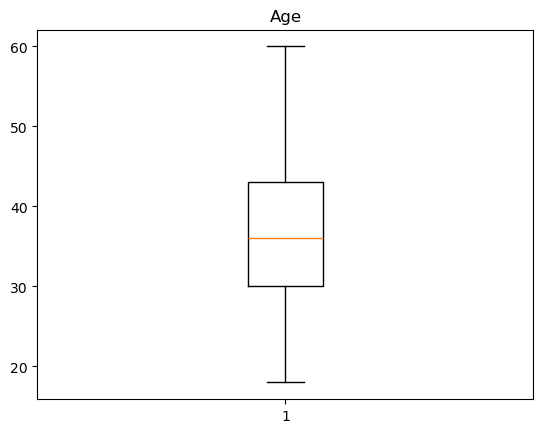

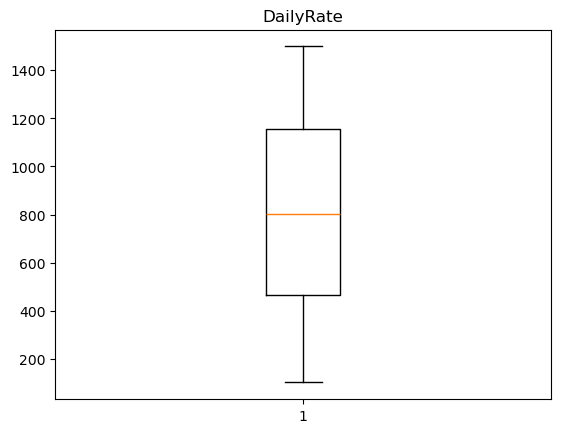

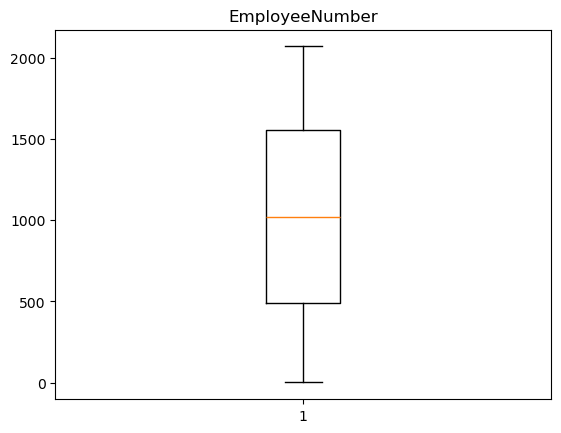

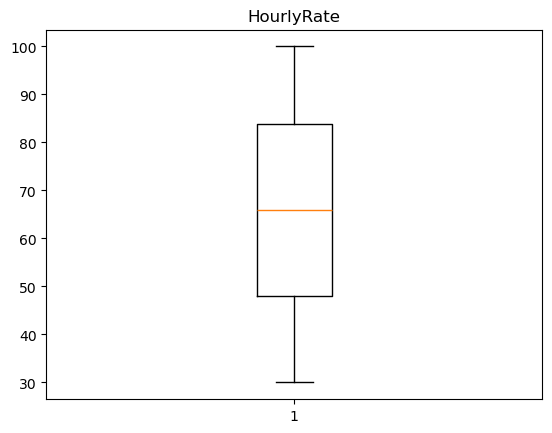

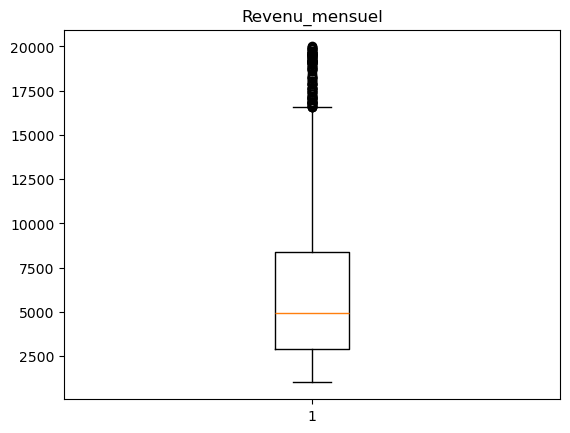

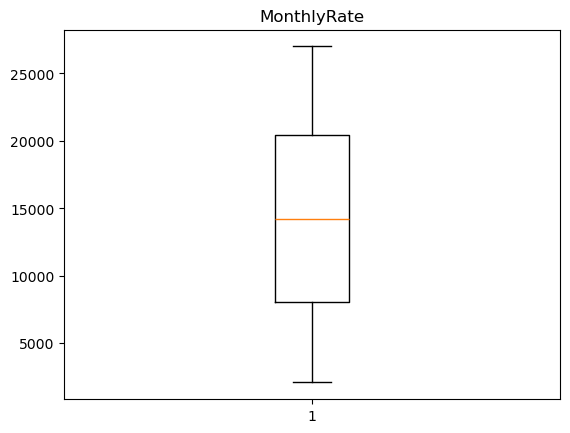

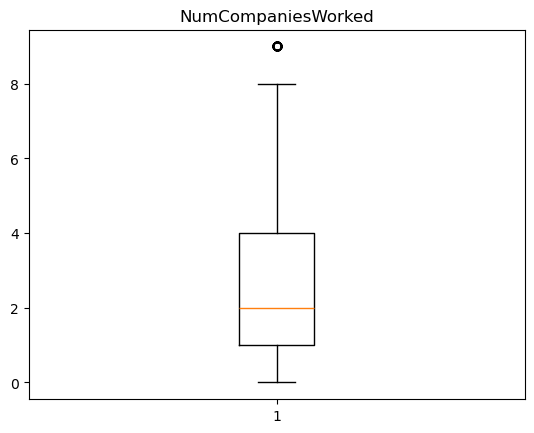

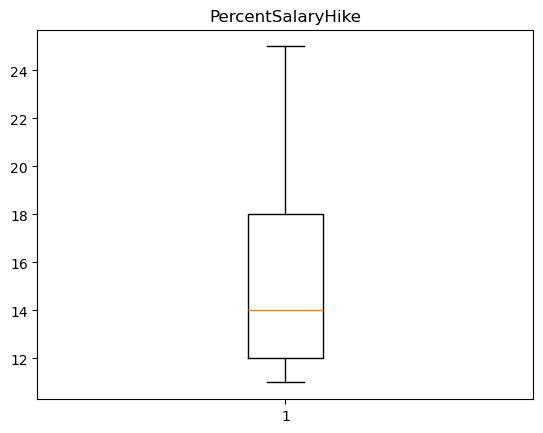

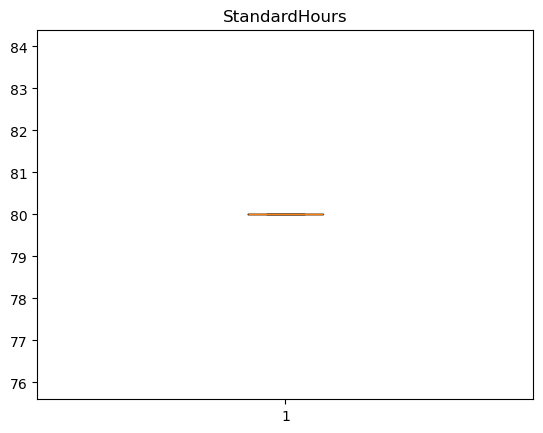

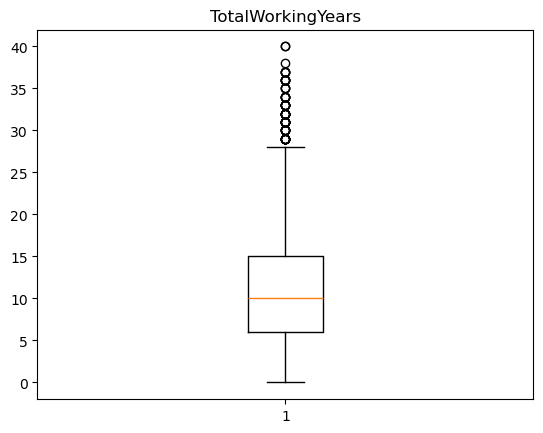

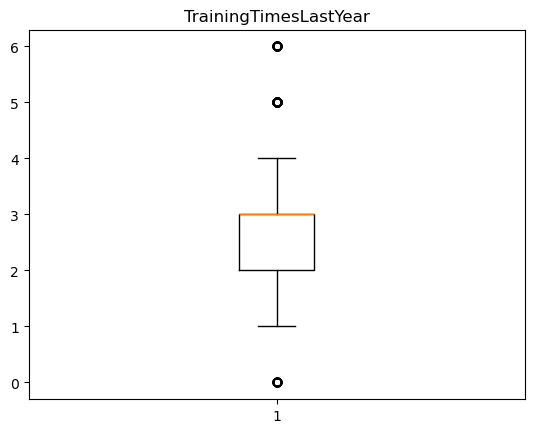

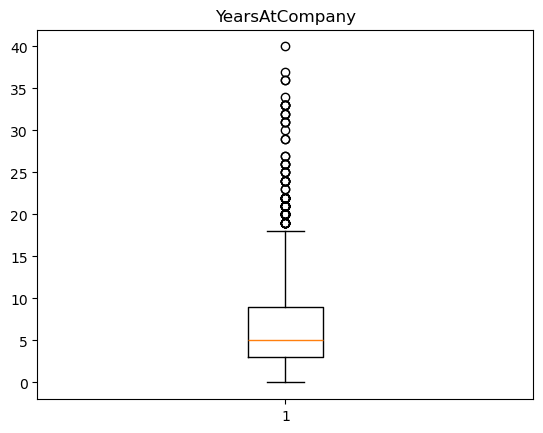

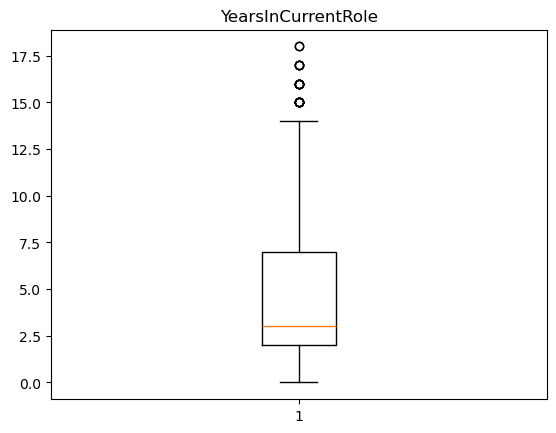

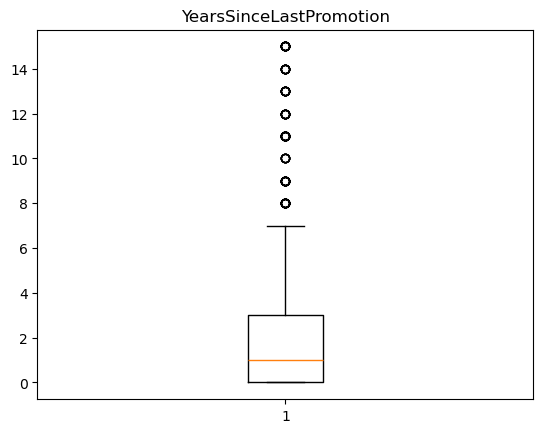

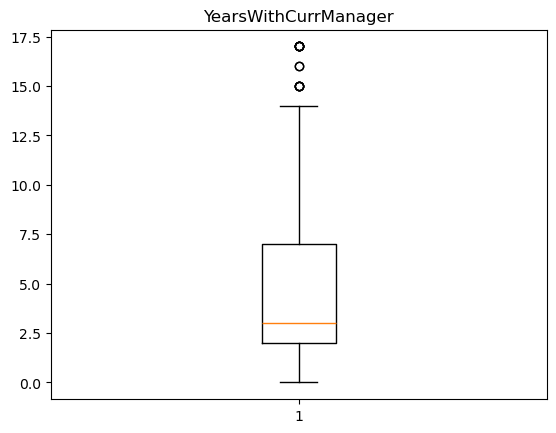

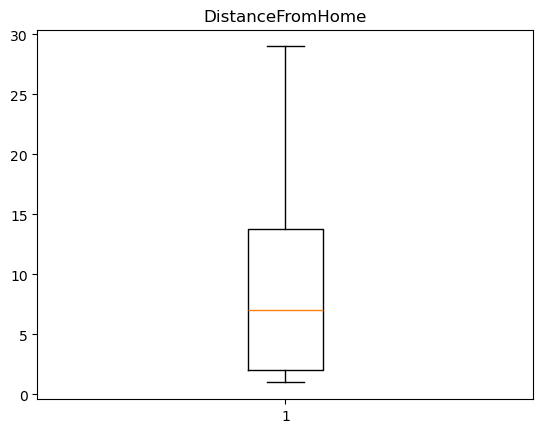

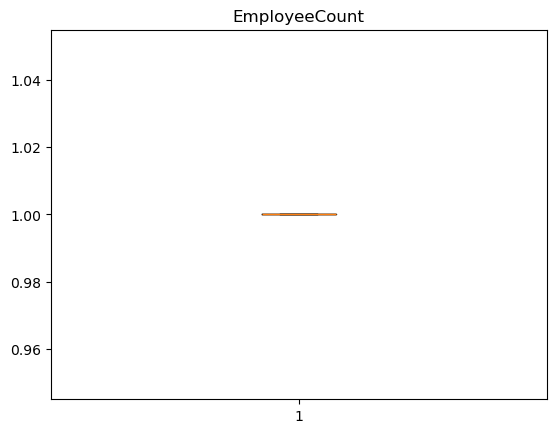

In [200]:
for col in Quantitative:
    plt.figure()
    plt.boxplot(df1[Quantitative][col])
    plt.title(col)

Les variables à supprimer pour le moment sont les suivantes:

    ["EmployeeCount", "EmployeeNumber","StandardHours","Over18_Index"]

Caractéristiques des Employés selon les variables Quantitatives

In [201]:
var_quanti_supprim=["EmployeeCount", "EmployeeNumber","StandardHours"]
var_quali_supprim=["Over18_Index"]
for col in var_quanti_supprim:
    Quantitative.remove(col)
    
for col in var_quali_supprim:
    Qualitative.remove(col)


In [202]:
#data_travail=df1[Quantitative+Qualitative]
data_travail=df1.drop(["EmployeeCount", "EmployeeNumber","StandardHours","Over18_Index"], axis=1
                     )

In [203]:
data_travail

Age Attrition    Voyage_affaires  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1.0          2  Life Sciences                        2   
1                  8.0          1  Life Sciences                        3   
2                  2.0          2          Other                        4   
3                  3.0          4  Life Sciences                        4   
4                  2.0          1        Medical                        1   
...                ...        ...            ...                      ...   
1465              23.0          2        Medical                        3   
1466               6.0          1        Medical                        4   
1467               4.0          3  Life Sciences                        2   
1468               2.0          3        Medical                        4   
1469               8.0          3        Medical                        2   

      Genre   HourlyRate  Implication_dans_emploi  JobLevel  \
0     Female          94                        3         2   
1       Male          61                        2         2   
2       Male          92                        2         1   
3     Female          56                        3         1   
4       Male          40                        3         1   
...      ...         ...                      ...       ...   
1465    Male          41                        4         2   
1466    Male          42                        2         3   
1467    Male          87                        4         2   
1468    Male          63                        2         2   
1469    Male          82                        4         2   

                        JobRole  Satisfaction_travail État_civil  \
0               Sales Executive                     4     Single   
1            Research Scientist                     2    Married   
2         Laboratory Technician                     3     Single   
3            Research Scientist                     3    Married   
4         Laboratory Technician                     2    Married   
...                         ...                   ...        ...   
1465      Laboratory Technician                     4    Married   
1466  Healthcare Representative                     1    Married   
1467     Manufacturing Director                     2    Married   
1468            Sales Executive                     2    Married   
1469      Laboratory Technician                     3    Married   

      Revenu_mensuel  MonthlyRate  NumCompaniesWorked Heures_supplémentaires  \
0               5993        19479                   8                    Yes   
1               5130        24907                   1                     No   
2               2090         2396                   6                    Yes   
3               2909        23159                   1                    Yes   
4               3468        16632                   9                     No   
...              ...          ...                 ...                    ...   
1465            2571  

In [204]:
base=data_travail.copy()
#Pour mieux visualiser les caractéristiques des employés nous allons labeliser les variables Categorielles nominales deja encodée dans la base de donnés
# pour mieux aborder le probleme pose a ce niveau on va d'abord labeliser les variables.

mapping ={1:"Inférieur au collège",2:"Collège",3:"Licence",4:"Master",5:"Docteur"}
base["Education"]=base["Education"].replace(mapping)
mapping ={1:"Faible", 2:"Moyen", 3:"Élevé" , 4:"Très élevé"}
base["Satisfaction_travail"]=base["Satisfaction_travail"].replace(mapping)
mapping ={1:"Faible", 2:"Moyen", 3:"Élevé" , 4:"Très élevé"}
base["Satisfaction_relationnelle"]=base["Satisfaction_relationnelle"].replace(mapping)
mapping ={1:"Faible", 2:"Bon", 3:"Excellent" , 4:"Exceptionnel"}
base["Évaluation_performance"]=base["Évaluation_performance"].replace(mapping)
mapping ={1:"Mauvais", 2:"Bon", 3:"Excellent" , 4:"Très élevé"}
base["WorkLifeBalance"]=base["WorkLifeBalance"].replace(mapping)


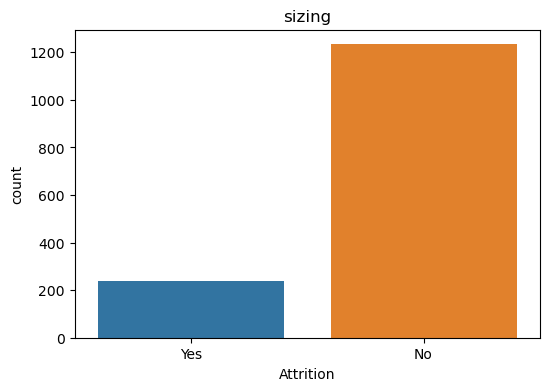

Attrition
No     1233
Yes     237
Name: count, dtype: int64
% demissionné:  16.122448979591837
% Non demissionné:  83.87755102040816
1470


In [205]:
fig , ax = plt.subplots(figsize = (6, 4))
sns.countplot(x = 'Attrition', data = data)
plt.title('sizing')
plt.show()
print(base['Attrition'].value_counts())
demissi = len(base[base['Attrition']=="Yes"])
nondemissi = len(base[base['Attrition']=="No"])
n = len(base)
print("% demissionné: ", demissi *100/n)
print("% Non demissionné: ", nondemissi*100/n)
print(n)

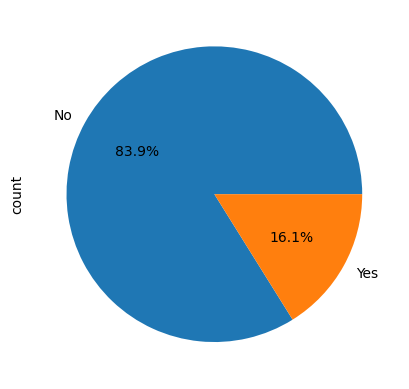

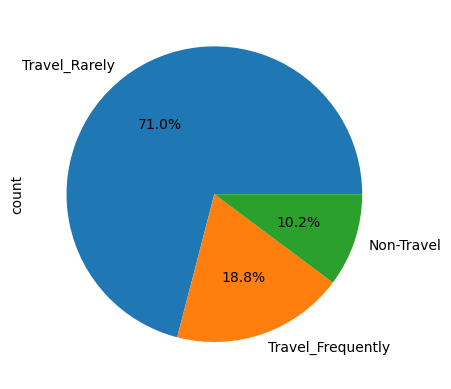

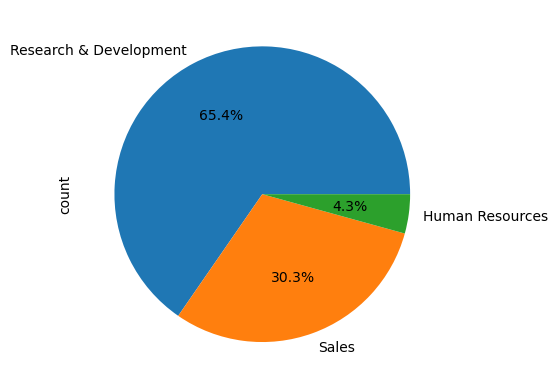

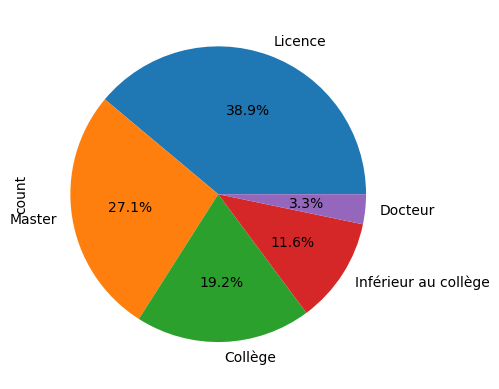

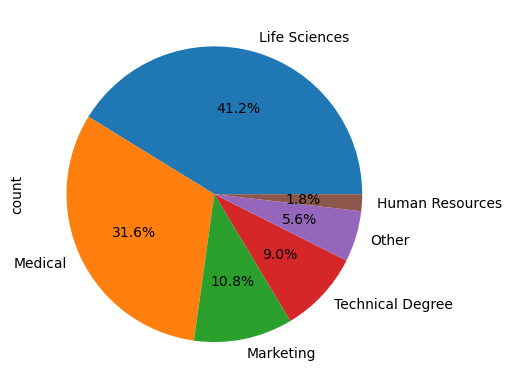

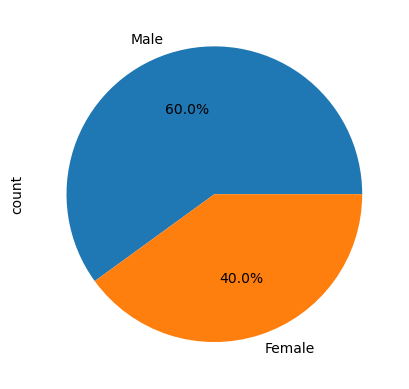

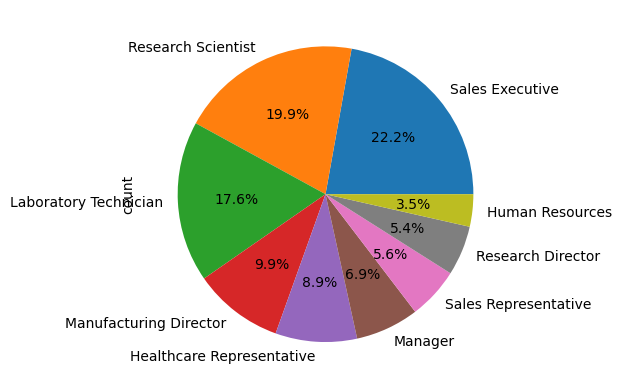

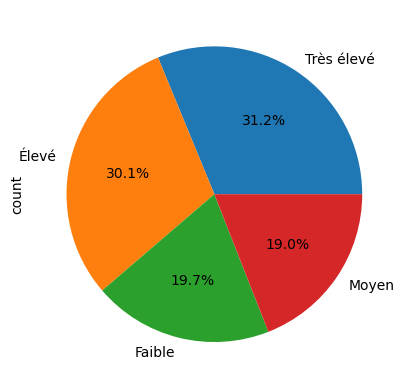

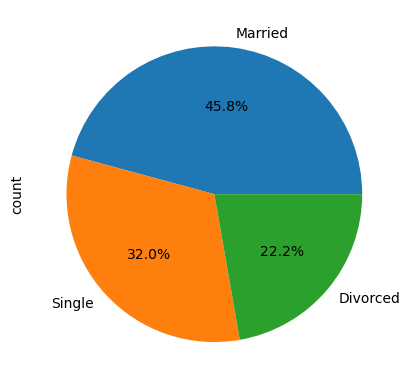

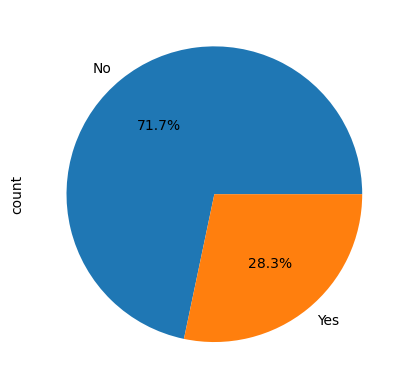

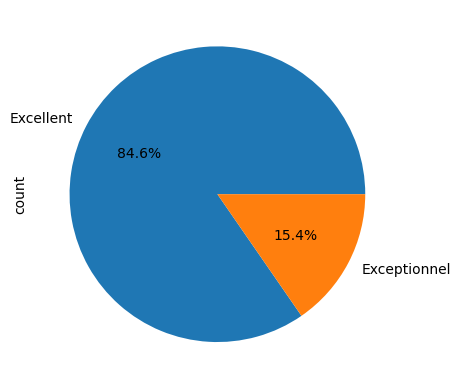

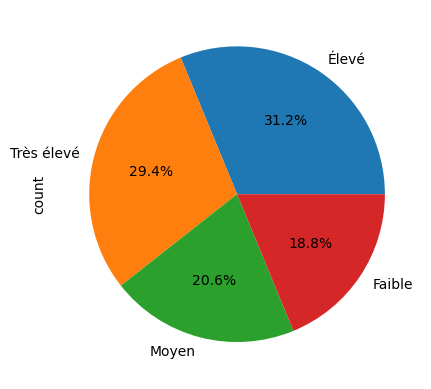

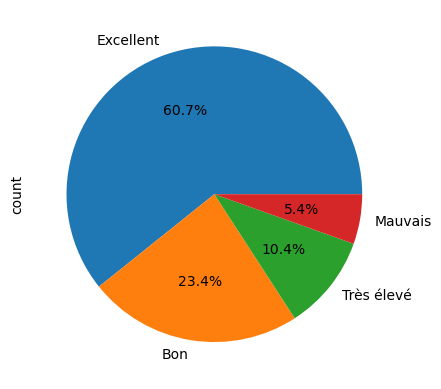

In [206]:
for col in base.select_dtypes("object"):
    plt.figure()
    base[col].value_counts().plot.pie(autopct="%1.1f%%")
    #plt.savefig("C://Users//TIAO ELIAS//Desktop//ISE//ise2023Tiao//PROJETMACHINELEARNING2024//"+col+".png")


Commentaire: Ces  Graphiques  laissent  voir que 16.1% des Employées ont demissioné

Caractéristiques des Employées selon les Variables Quantitatives

In [207]:
base[Quantitative].describe()

Age    DailyRate   HourlyRate  Revenu_mensuel   MonthlyRate  \
count  1470.000000  1470.000000  1470.000000     1470.000000   1470.000000   
mean     36.923810   802.485714    65.891156     6502.931293  14313.103401   
std       9.135373   403.509100    20.329428     4707.956783   7117.786044   
min      18.000000   102.000000    30.000000     1009.000000   2094.000000   
25%      30.000000   465.000000    48.000000     2911.000000   8047.000000   
50%      36.000000   802.000000    66.000000     4919.000000  14235.500000   
75%      43.000000  1157.000000    83.750000     8379.000000  20461.500000   
max      60.000000  1499.000000   100.000000    19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524          11.279592   
std              2.498009           3.659938           7.780782   
min              0.000000          11.000000           0.000000   
25%              1.000000          12.000000           6.000000   
50%              2.000000          14.000000          10.000000   
75%              4.000000          18.000000          15.000000   
max              9.000000          25.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count            1470.000000     1470.000000         1470.000000   
mean                2.799320        7.008163            4.229252   
std                 1.289271        6.126525            3.623137   
min                 0.000000        0.000000            0.000000   
25%                 2.000000        3.000000            2.000000   
50%                 3.000000        5.000000            3.000000   
75%                 3.000000        9.000000            7.000000   
max                 6.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  DistanceFromHome  
count              1470.000000           1470.000000       1470.000000  
mean                  2.187755              4.123129          9.123129  
std                   3.222430              3.568136          8.042210  
min                   0.000000              0.000000          1.000000  
25%                   0.000000              2.000000          2.000000  
50%                   1.000000              3.000000          7.000000  
75%                   3.000000              7.000000         13.750000  
max                  15.000000             17.000000         29.000000

## Etude des Corrélations 

Eventuelles Liaisons entre les  différentes variables quantitatitves 

l'Objectif de cette sous partie , est de voir s' il exite des variables quantitatives qui sont fortements correlées entre elles afin de restreindre le nombre de variables 

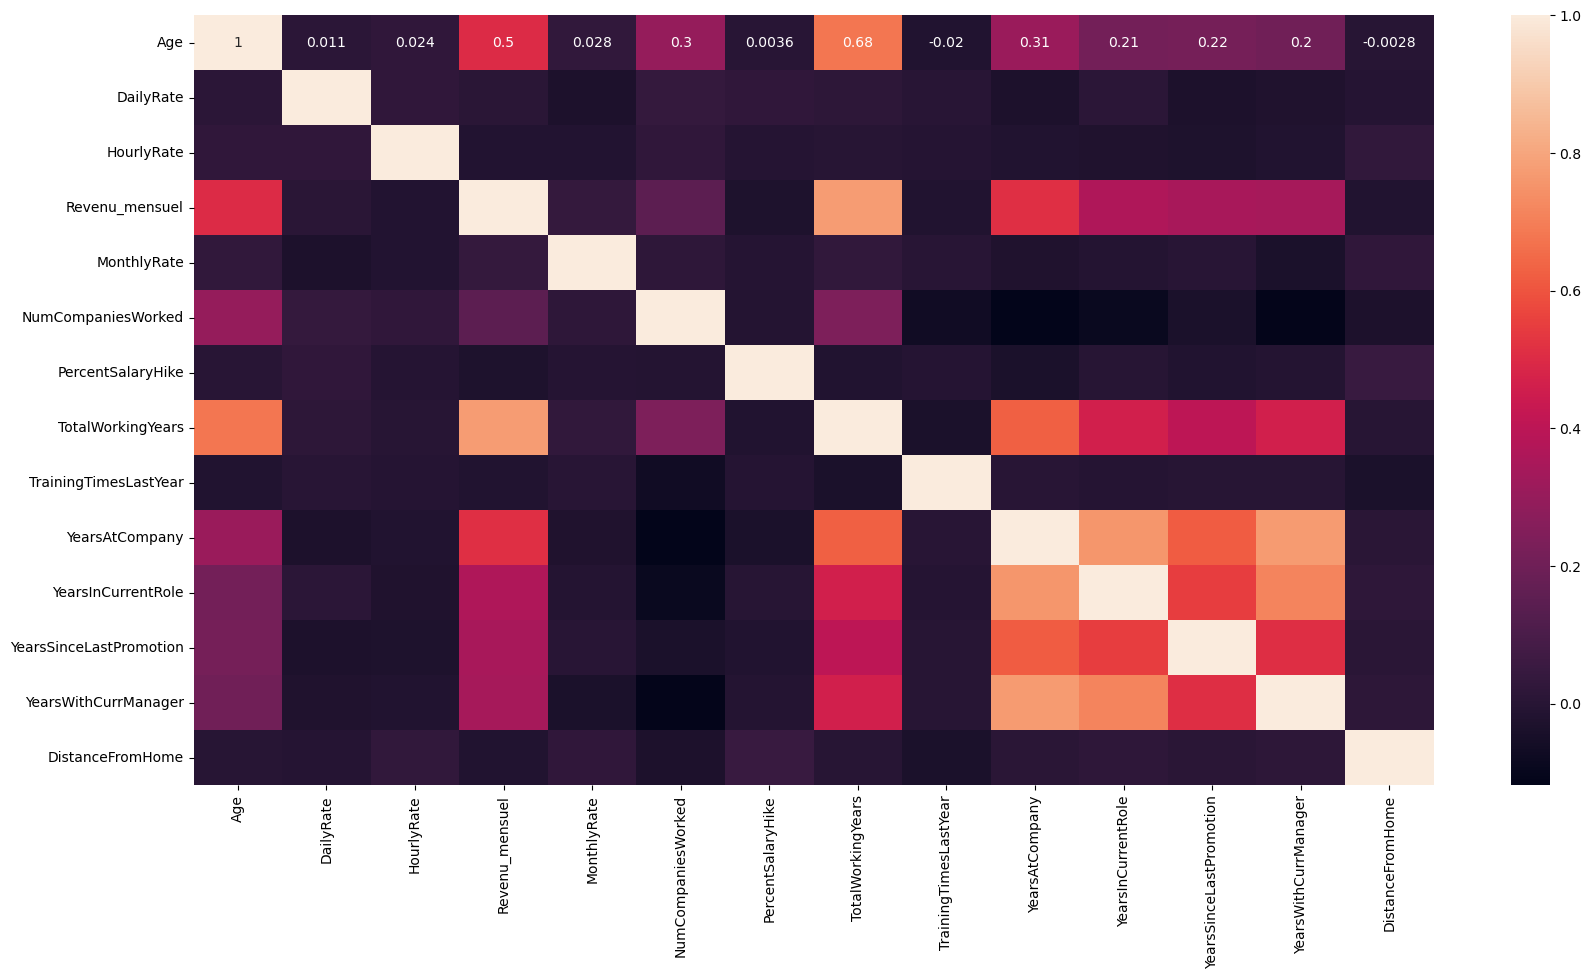

In [208]:
plt.figure(figsize=(20, 10))
matricorr=base[Quantitative].corr()
sns.heatmap(matricorr, annot=True)
plt.show()

Commentaire:La matrice de corrélation laisse voir que les coeffients de corrélations entre les differentes variables quantitatives prises deux à deux sont tous inferieurs à 0.8.
    Ainsi l'on ne peut pas supprimé une variable en se basant sur la matrice de corrélation.

c:\Users\elias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

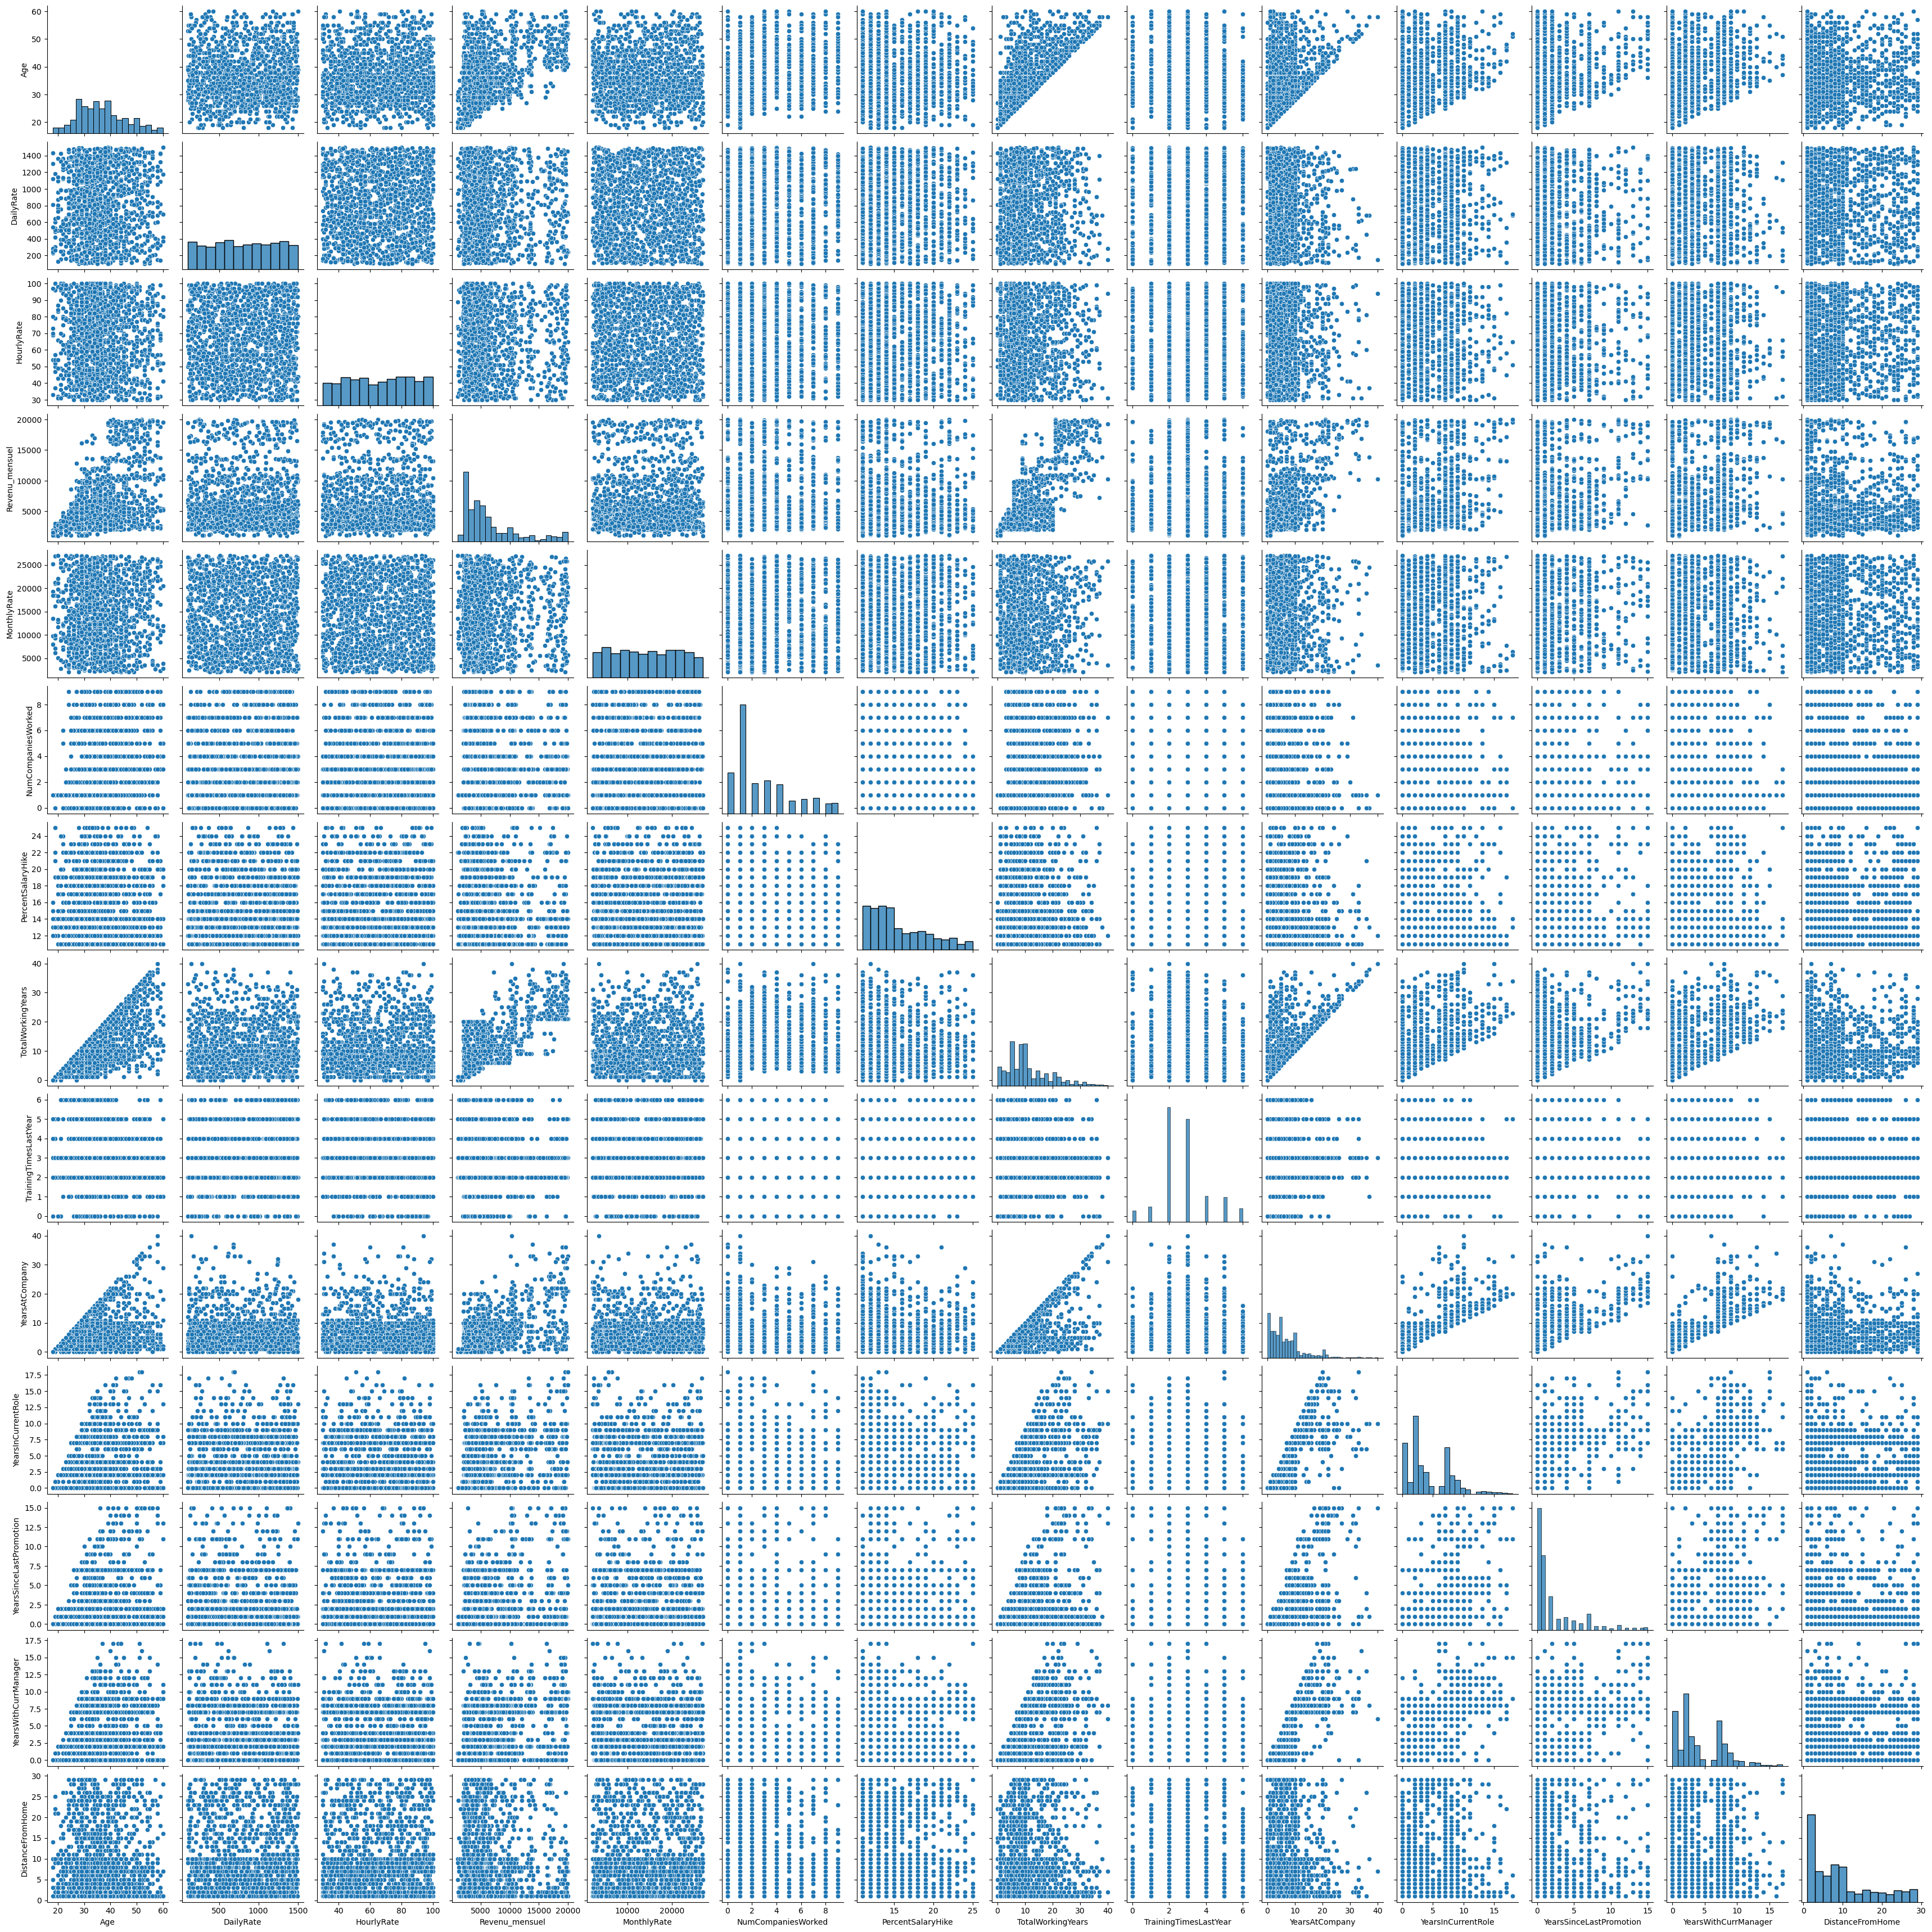

In [209]:
sns.pairplot(base[Quantitative])

### Evaluations des liaisons entre les differentes variables Qualitatives

l'Objectif de cette sous partie est de voir si parmis les variables Qualitatives(explicatives) dans la base de donnée si certainnes sont corrélées entre elles afin de restreindre le nombre de variables

In [210]:
Qualitative

['Attrition',
 'Voyage_affaires',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Genre\xa0',
 'Implication_dans_emploi',
 'JobLevel',
 'JobRole',
 'Satisfaction_travail',
 'État_civil',
 'Heures_supplémentaires',
 'Évaluation_performance',
 'Satisfaction_relationnelle',
 'StockOptionLevel',
 'WorkLifeBalance']

   ### Realiastions du test de khi deux entre les variables Qualitatives pour voir si certainnes variables sont fortement corrélés

In [211]:
from scipy.stats import chi2_contingency

In [212]:


for colu in Qualitative:
    u={}
    v={}
    j=0
    for col in Qualitative:
        if col!=colu:
            chi2, p_value, dof, expected=chi2_contingency(pd.crosstab(df1[colu], df1[col]))
            
            contingency_table=pd.crosstab(base[colu], base[col])
            n=contingency_table.sum().sum()

            phi_cramer=np.sqrt(chi2/(n*(min(contingency_table.shape)-1)))
            #if phi_cramer<0.01 or phi_cramer>0.5:
                #print("v de cramer entre"+ " "+col+" "+"et" +" "+colu)
                #print(phi_cramer)
            #A[i][j]=phi_cramer
            if p_value<0.05:
                u[col]= "v_cramer:"+str(phi_cramer)
            else:
                v[col]="v_cramer:"+str(phi_cramer)
    print(" var_qualitative_corrélé avec "+colu)
    print(u)
    print(" var_qualitative_non_correlé avec "+ colu)
    print(v)
#datav_cramer=pd.DataFrame(A,columns=Qualitative, index=Qualitative)




 var_qualitative_corrélé avec Attrition
{'Voyage_affaires': 'v_cramer:0.12825997643406717', 'Department': 'v_cramer:0.0856984402909795', 'EducationField': 'v_cramer:0.10440851908182987', 'EnvironmentSatisfaction': 'v_cramer:0.12372858554725893', 'Implication_dans_emploi': 'v_cramer:0.13922042727457964', 'JobLevel': 'v_cramer:0.2221248853650073', 'JobRole': 'v_cramer:0.24214215996065436', 'Satisfaction_travail': 'v_cramer:0.1091247710343438', 'État_civil': 'v_cramer:0.1772113472450737', 'Heures_supplémentaires': 'v_cramer:0.24406463632881792', 'StockOptionLevel': 'v_cramer:0.2030353025269054', 'WorkLifeBalance': 'v_cramer:0.10538267516821954'}
 var_qualitative_non_correlé avec Attrition
{'Education': 'v_cramer:0.04572887712247177', 'Genre\xa0': 'v_cramer:0.027565224125453088', 'Évaluation_performance': 'v_cramer:0.0003244612429112405', 'Satisfaction_relationnelle': 'v_cramer:0.05971057096963258'}
 var_qualitative_corrélé avec Voyage_affaires
{'Attrition': 'v_cramer:0.12825997643406717'}

#### Les V de Cramer entre les differentes variables Qualitatives explicatives entre elles sont faibles ainsi , cette approche nous permet pas de supprimé certainnes variables explicatives

Afficher les variables Qualitatives qui sont fortement liées entre elles et celles qui ne sont pas corrélées entre elles

In [213]:
for colu in Qualitative:
    u={}
    v={}
    j=0
    for col in Qualitative:
        if col!=colu:
            chi2, p_value, dof, expected=chi2_contingency(pd.crosstab(df1[colu], df1[col]))
        
            contingency_table=pd.crosstab(base[colu], base[col])
            n=contingency_table.sum().sum()

            phi_cramer=np.sqrt(chi2/(n*(min(contingency_table.shape)-1)))
            if phi_cramer<0.01 or phi_cramer>0.7:
                print("v de cramer entre"+ " "+col+" "+"et" +" "+colu)
                print(phi_cramer)
    

v de cramer entre Évaluation_performance et Attrition
0.0003244612429112405
v de cramer entre Department et Voyage_affaires
0.008286640185851192
v de cramer entre Voyage_affaires et Department
0.008286640185851192
v de cramer entre JobRole et Department
0.939392649020428
v de cramer entre Heures_supplémentaires et Department
0.007979847056650292
v de cramer entre Department et JobRole
0.939392649020428
v de cramer entre Department et Heures_supplémentaires
0.00797984705665029
v de cramer entre Évaluation_performance et Heures_supplémentaires
0.0022757020399347275
v de cramer entre Attrition et Évaluation_performance
0.0003244612429112405
v de cramer entre Heures_supplémentaires et Évaluation_performance
0.0022757020399347275


## Les Eventuelles liaisons qui pourront exister entre la variable Target="Attrition" et les Variables Quantitatives

visualison graphique des densités de distribution de chaque variable Quantitative en fonction de la variable Attrition

In [214]:
demis=base[base["Attrition"]=="Yes"]
non_demis=base[base["Attrition"]=="No"]

C:\Users\elias\AppData\Local\Temp\ipykernel_6952\3282823933.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(demis[col], label="demissionné")
c:\Users\elias\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\elias\AppData\Local\Temp\ipykernel_6952\3282823933.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
si

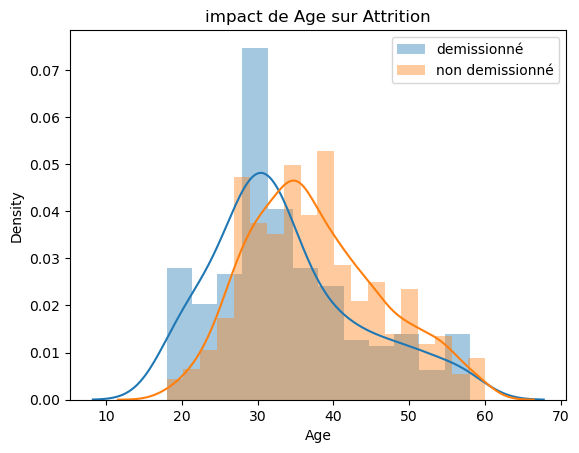

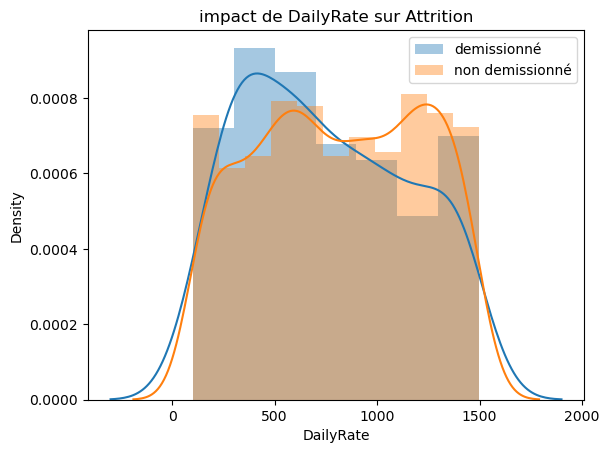

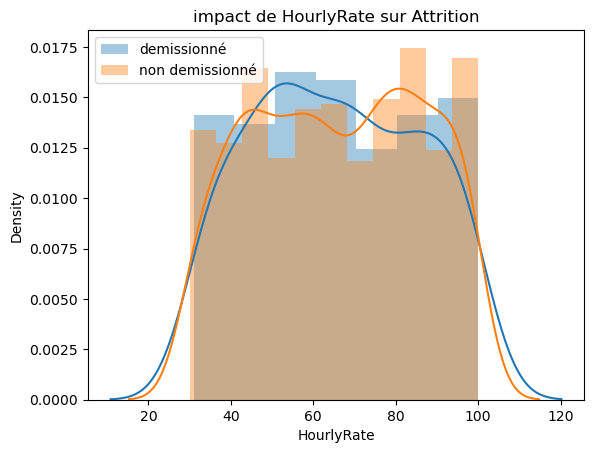

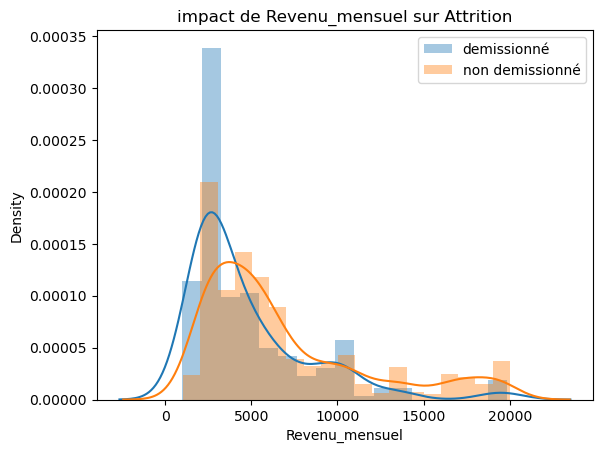

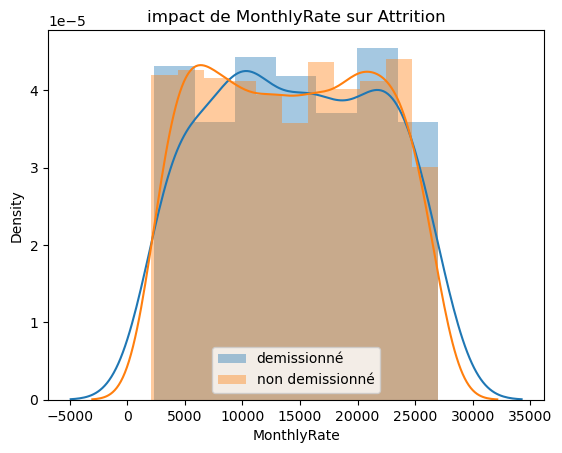

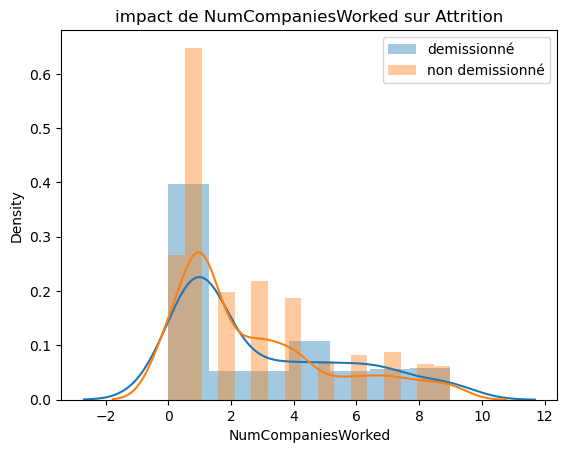

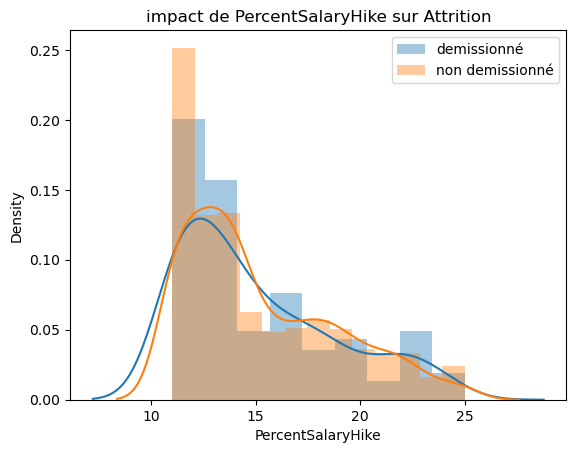

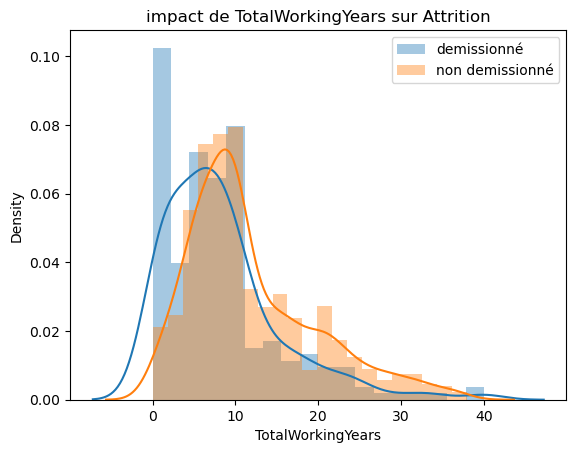

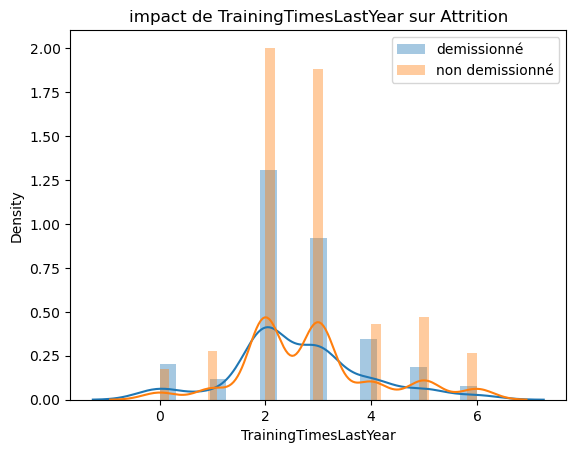

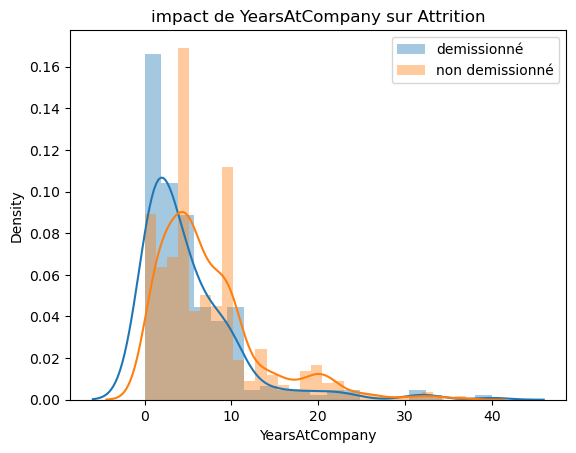

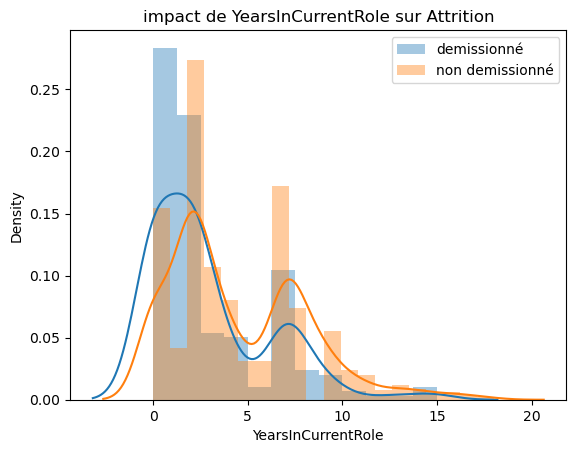

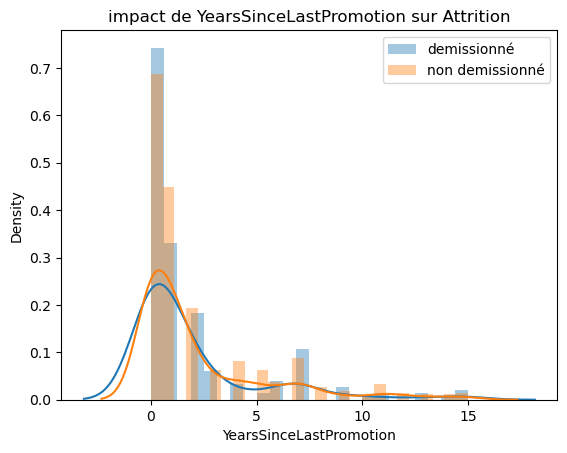

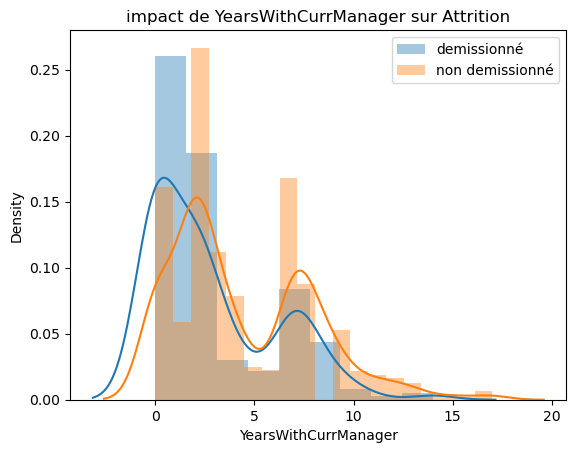

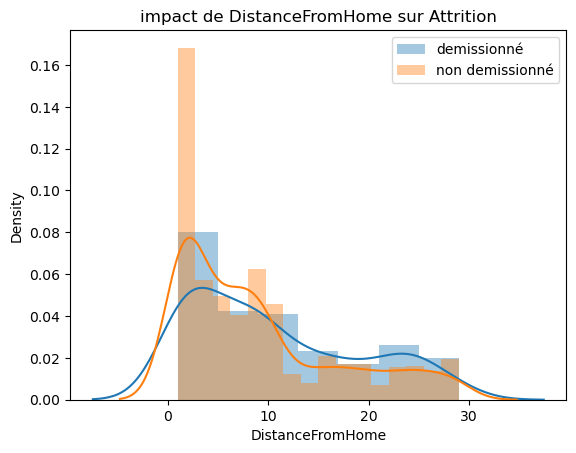

In [215]:
for col in Quantitative:

    plt.figure()
    sns.distplot(demis[col], label="demissionné")
    sns.distplot(non_demis[col], label="non demissionné")
    plt.title("impact de"+ " "+ col+" "+"sur"+ " "+ "Attrition")
    plt.legend()

Visualisation des relations à travers les Boxplots

C:\Users\elias\AppData\Local\Temp\ipykernel_6952\2402082748.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

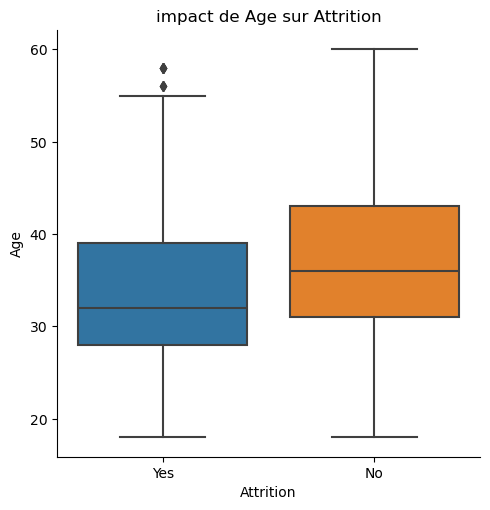

<Figure size 640x480 with 0 Axes>

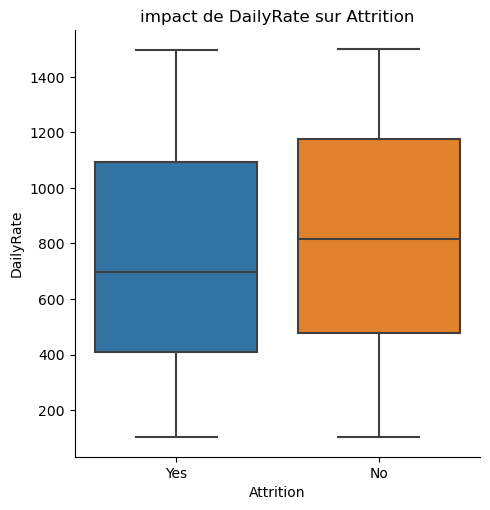

<Figure size 640x480 with 0 Axes>

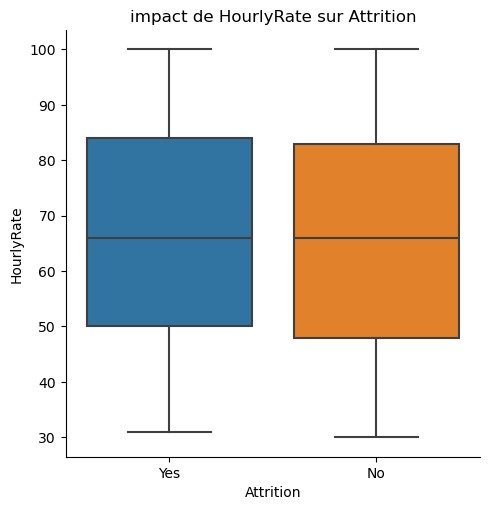

<Figure size 640x480 with 0 Axes>

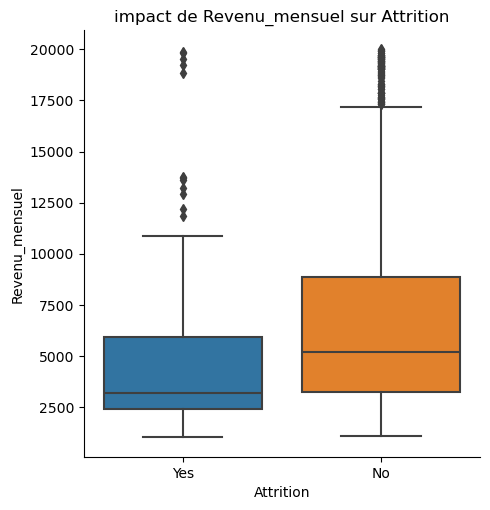

<Figure size 640x480 with 0 Axes>

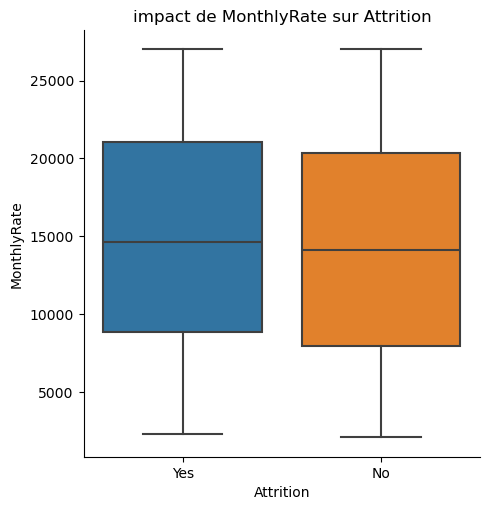

<Figure size 640x480 with 0 Axes>

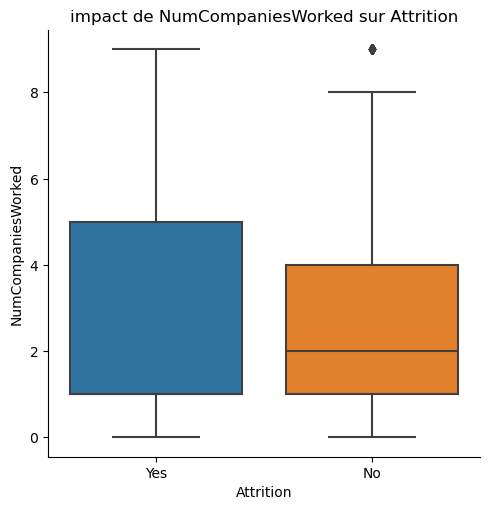

<Figure size 640x480 with 0 Axes>

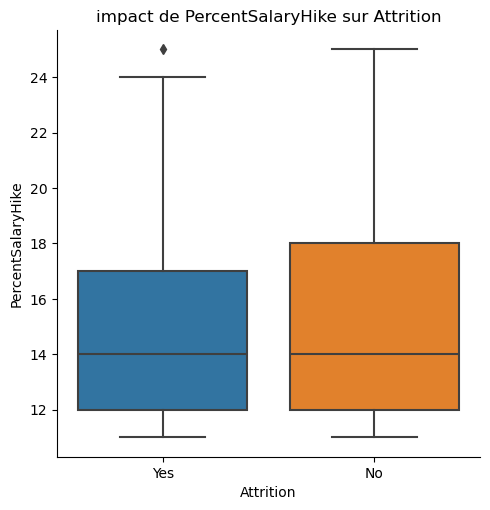

<Figure size 640x480 with 0 Axes>

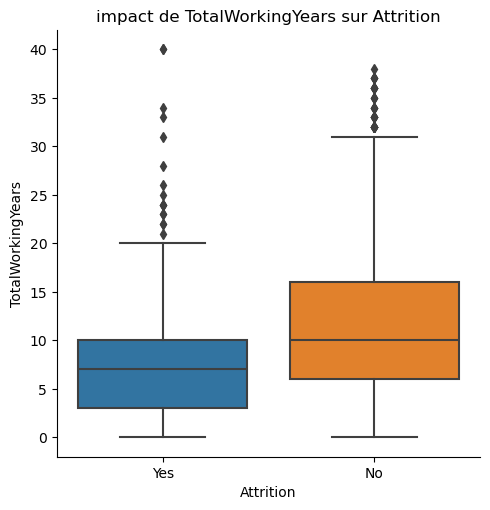

<Figure size 640x480 with 0 Axes>

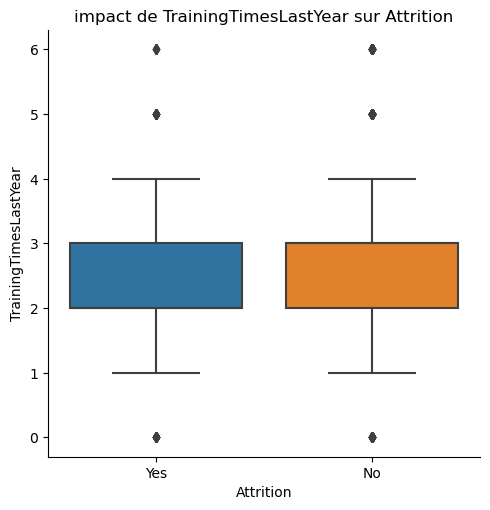

<Figure size 640x480 with 0 Axes>

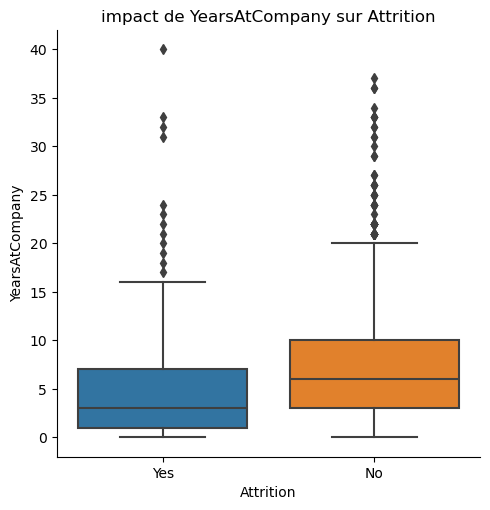

<Figure size 640x480 with 0 Axes>

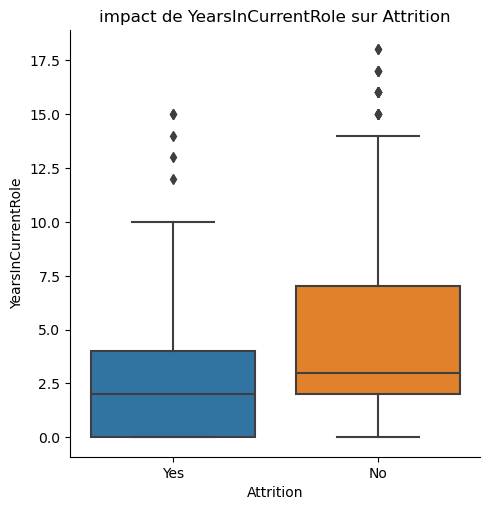

<Figure size 640x480 with 0 Axes>

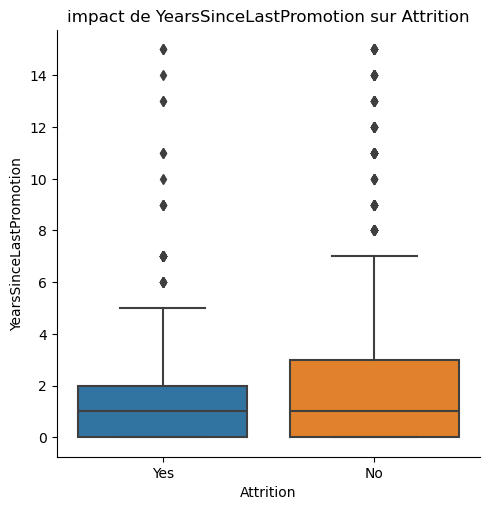

<Figure size 640x480 with 0 Axes>

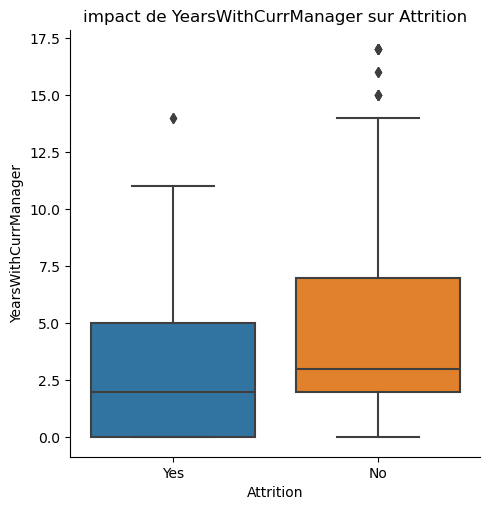

<Figure size 640x480 with 0 Axes>

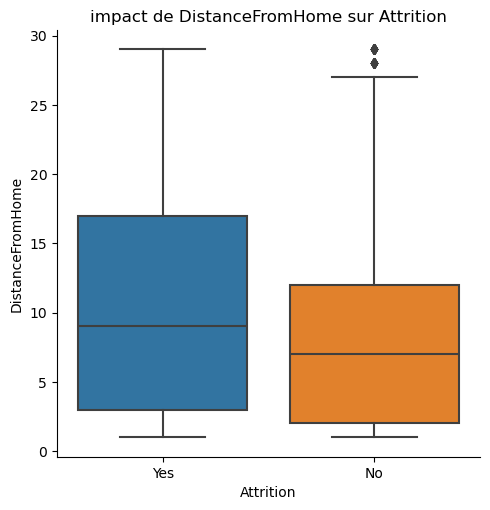

In [216]:
for col  in Quantitative:
    plt.figure()
    sns.catplot(data=base,x="Attrition", y=col,kind="box" )
    plt.title("impact de"+ " "+ col+" "+"sur"+ " "+ "Attrition")

Commentaire:

A travers les Boxplots ci dessus on peut supconner que les variables 
    HourlyRate,MothlyRate, TrainingTmesLastYear n'expliquent pas le fait qu'une personne soit demissioné ou Non .
    
    Mais parcontre les autres variables Quantitatives telles que:
    
    'Age','DailyRate','Revenu_mensuel','NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',,'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager','DistanceFromHome'peuvent avoir un impact sur la decision de l'employé(i.e decide de demissionner ou non)

Aussi les Boxplots dévoilent la presence des Outliers .Ces Outliers vont etre traité ultérierement

In [217]:
Quantitative

['Age',
 'DailyRate',
 'HourlyRate',
 'Revenu_mensuel',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

In [218]:
def percentile(var, i):
    print('Mean', var.mean())
    print('Coef Variation', var.mean()/var.std())
    for k in range(i):
        print(k/i, var.quantile(k/i))

In [219]:
percentile(base.Age,4)

Mean 36.923809523809524
Coef Variation 4.041850020441662
0.0 18.0
0.25 30.0
0.5 36.0
0.75 43.0


Commentaire :
    
La moitié des Employés avaient moins de 36 ans et l'autre moitié avaient plus de 36 ans 

In [220]:
# Percentile Object

# 10th Percentile
def q10(x):
    return x.quantile(0.1)

# 20th Percentile
def q20(x):
    return x.quantile(0.2)

# 30th Percentile
def q30(x):
    return x.quantile(0.3)

# 40th Percentile
def q40(x):
    return x.quantile(0.4)

# 50th Percentile
def q50(x):
    return x.quantile(0.5)

# 60th Percentile
def q60(x):
    return x.quantile(0.6)

# 70th Percentile
def q70(x):
    return x.quantile(0.7)

# 80th Percentile
def q80(x):
    return x.quantile(0.8)

# 90th Percentile
def q90(x):
    return x.quantile(0.9)

# 95th Percentile
def q95(x):
    return x.quantile(0.95)

# 99th Percentile
def q99(x):
    return x.quantile(0.99)

In [221]:
def distrib (x):
    return base.groupby(['Attrition']).agg({x: [q10, q20, q30, q40, q50, q60, q70, q80, q90, q99, 'mean']})

In [222]:
for col in Quantitative:
    
    print(distrib(col))
    print("--------------------------------")

            Age                                                        \
            q10   q20   q30   q40   q50   q60   q70   q80   q90   q99   
Attrition                                                               
No         27.0  30.0  32.0  34.0  36.0  39.0  42.0  45.0  51.0  59.0   
Yes        22.0  26.0  28.0  30.0  32.0  34.0  36.2  41.0  49.0  58.0   

                      
                mean  
Attrition             
No         37.561233  
Yes        33.607595  
--------------------------------
          DailyRate                                                     \
                q10    q20    q30    q40    q50    q60     q70     q80   
Attrition                                                                
No            240.2  408.0  546.0  669.8  817.0  959.0  1109.8  1229.6   
Yes           250.2  341.2  456.8  589.0  699.0  870.2   994.6  1161.0   

                                        
              q90      q99        mean  
Attrition                        

Commentaire:

Les Statistiques ci dessus devoilent que géneralement ce sont les moins agés qui démissionnaient dans l'entreprise.
Ceux qui demissionnaient avaient en moyenne 33.60 ans et les non demissionés avaient en moyenne 37.56 ans.
Par ailleurs l'age median de ceux qui demissionnaient était de 32 ans et les non demissionés avaaient un age median de 36 ans

ils ressort de ces statistiques que ce qui demissionnaient avaient un revenu mensuel faibles par rapport aux employés  qui ne demissionnaient pas .
le revenu_mensuel median de ceux  qui ont  demissionées étaient de 3202 .Par contre qui n'ont pas demissionnées avaiant un revenu median de 5204

Les Employés ayant demissionné ont un nombre d'années de travail faible par rapport à ceux n'ayant pas demissionné.
Ceux ayant demissionné , la moitié d'entre eux avaient un nombre d'anné de travail inferieru ou égal a 7 .Par contre seulement les 3/10 ème de ceux n'ayant pas demissionné avaient un nombre d'anné de travail infrieure ou égale à 7 ans  

Les Employés ayant demissionnés de l'Entreprise habitaient moins proches de l'Entreprise comparativement à ceux n'ayant pas demissionné.
50% des Employés ayant demissionné de l'entreprise habitaient à plus de 10 km de l'entreprise Par contre ceux n'ayant pas demissionné de l'Entreprise plus de 60% habitaient à moin de 10 KM de l'Entreprise 

## Etude des Eventuelles liaisons entre les variables Qualitatives et la variable Attrition

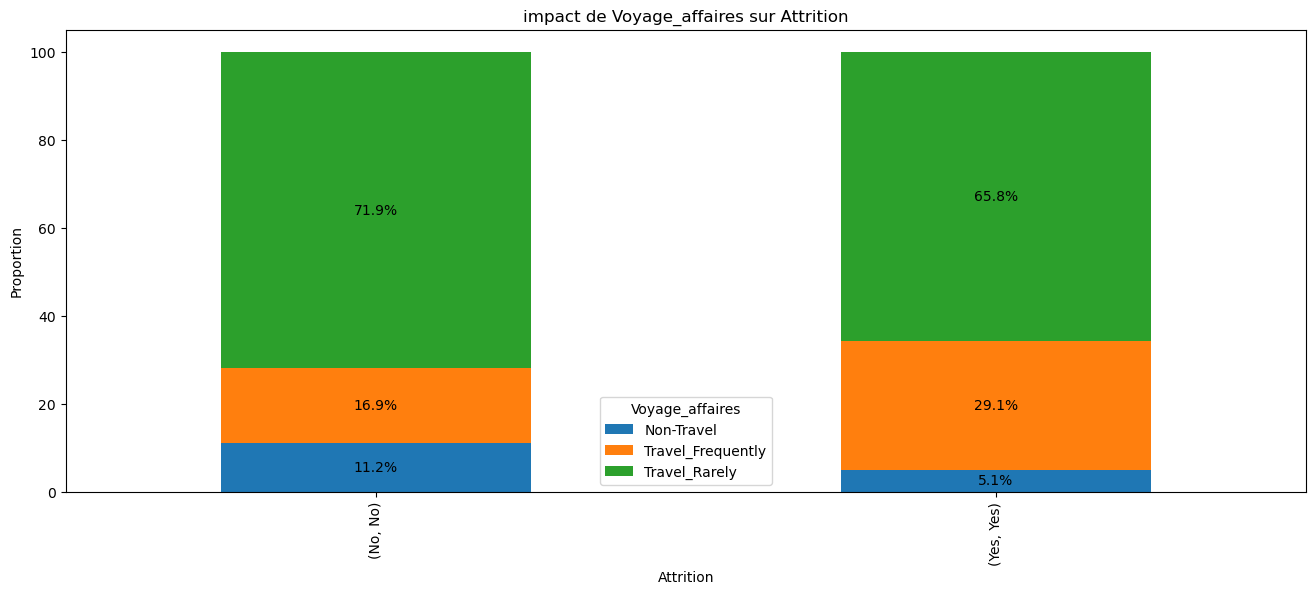

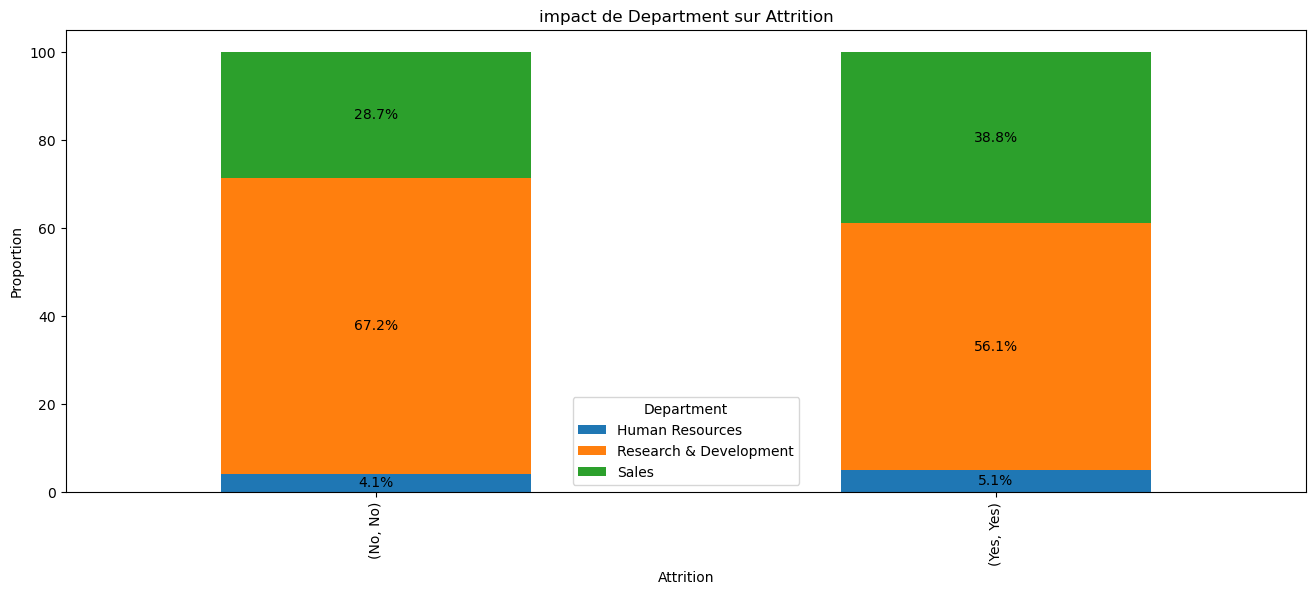

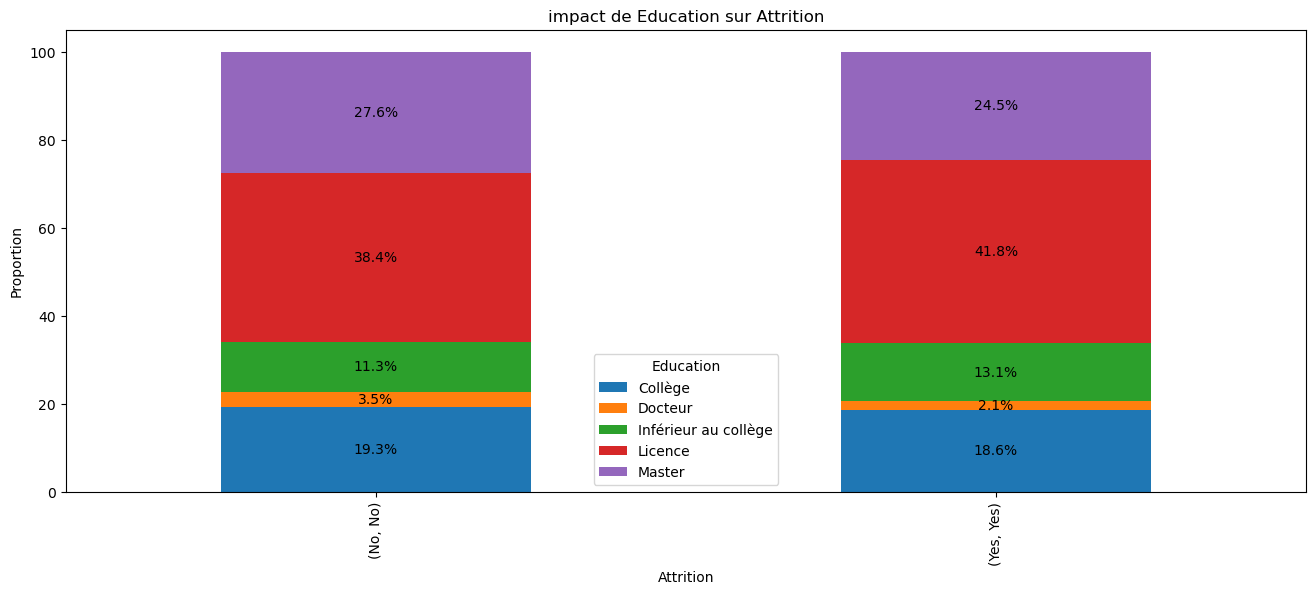

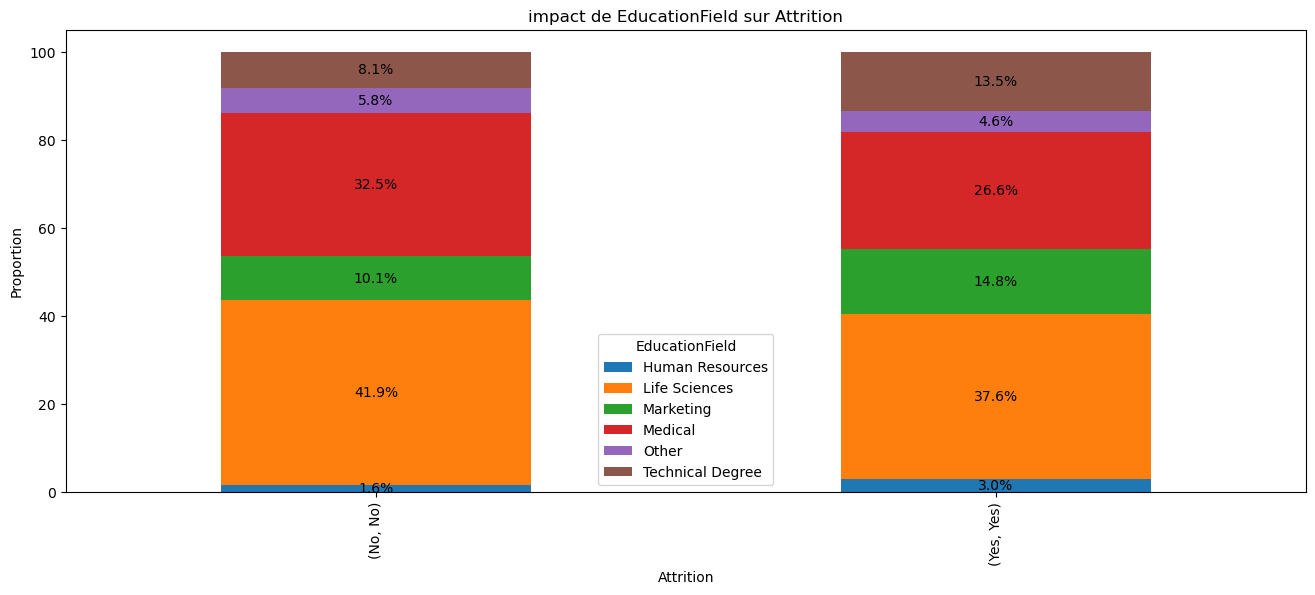

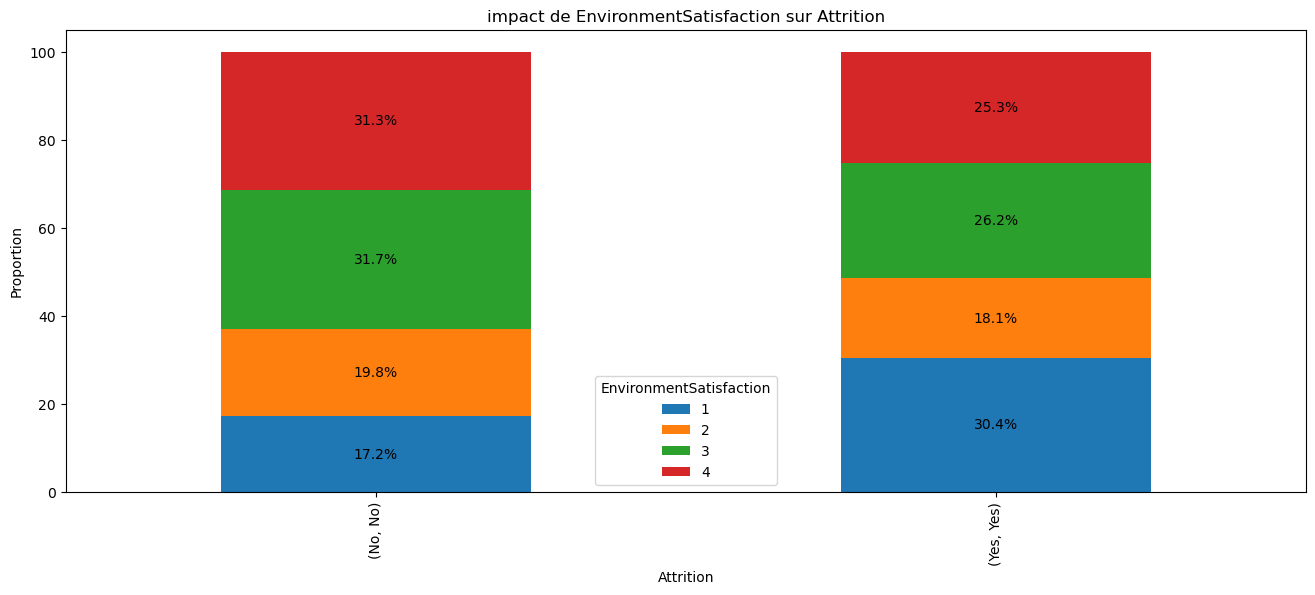

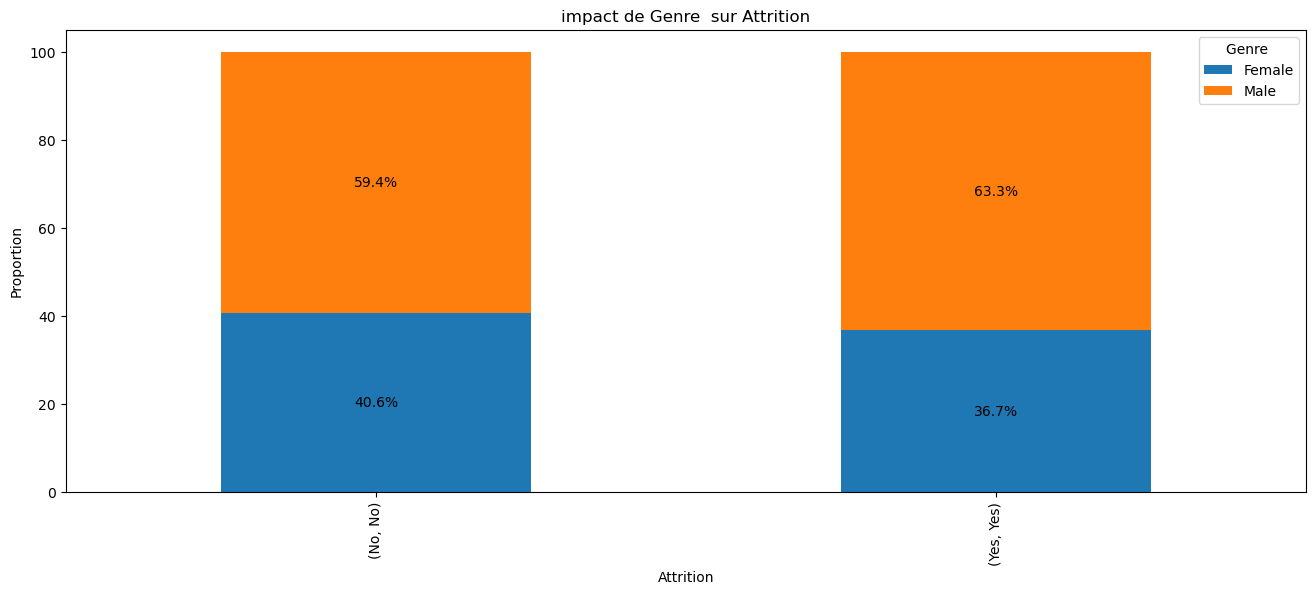

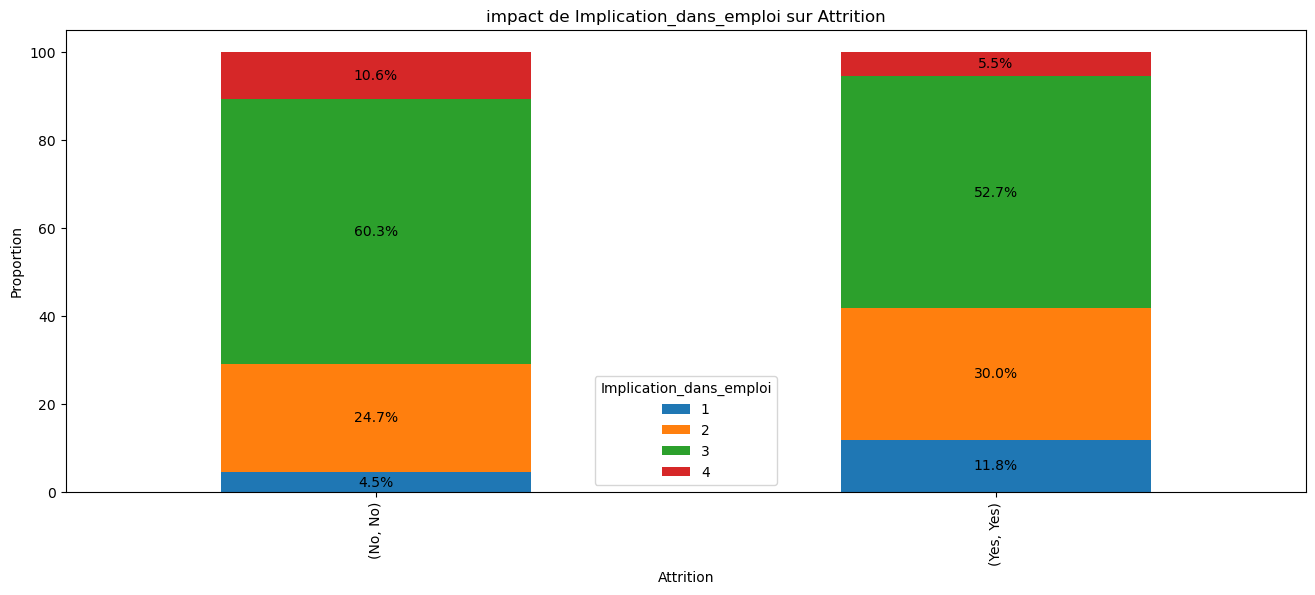

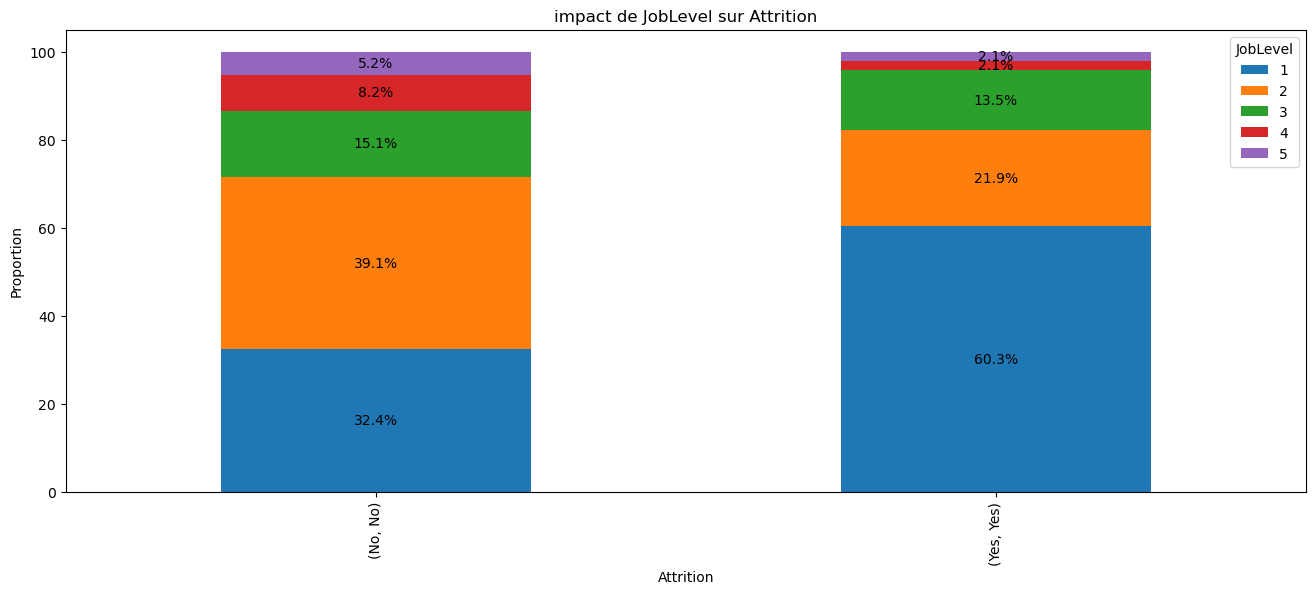

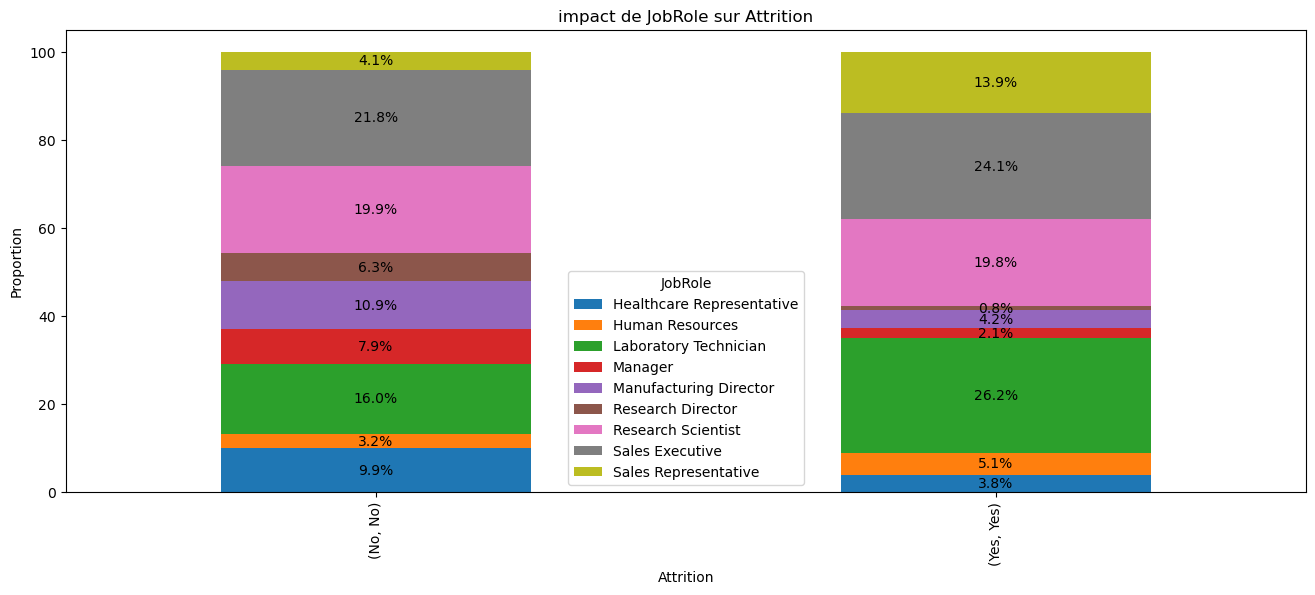

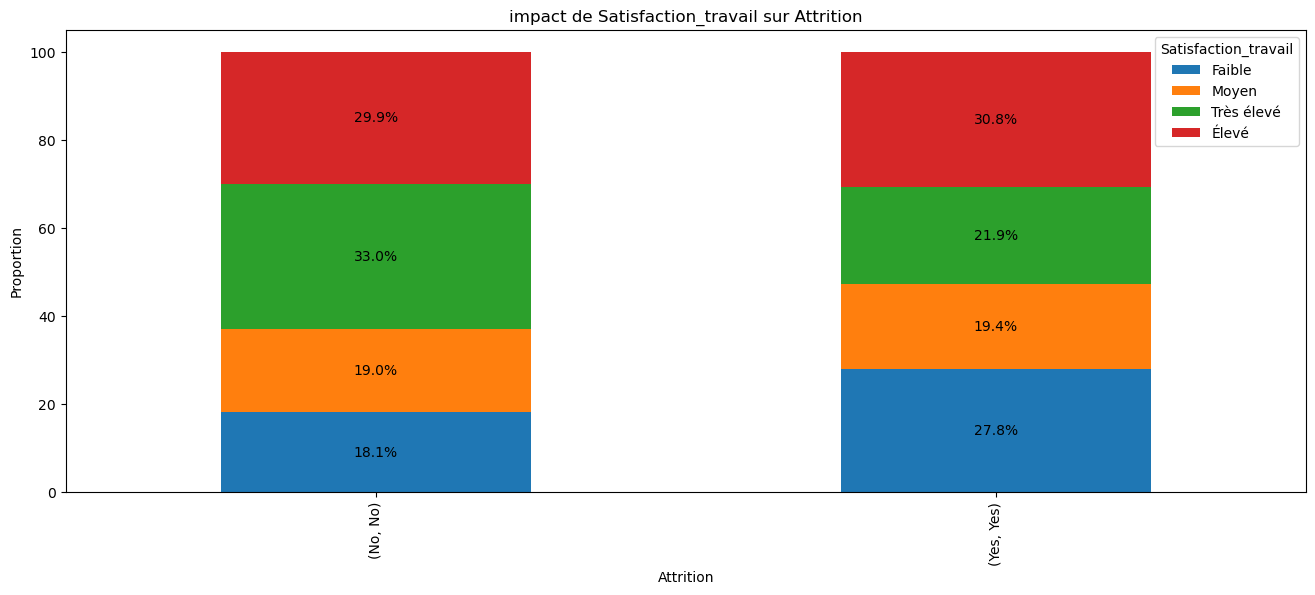

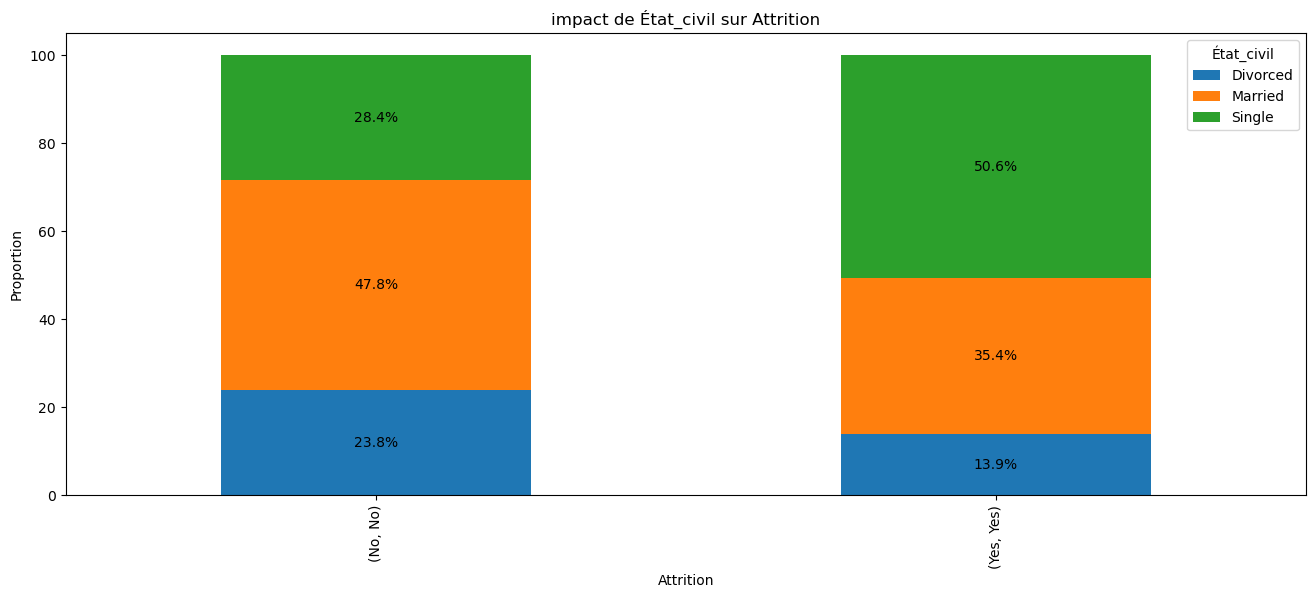

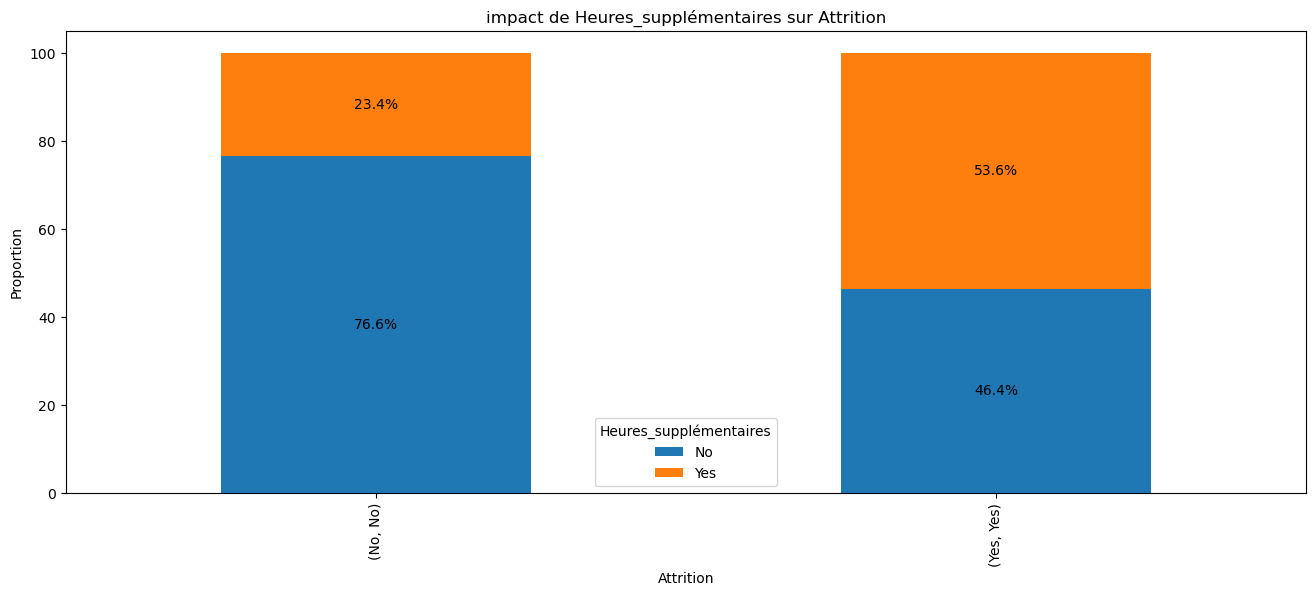

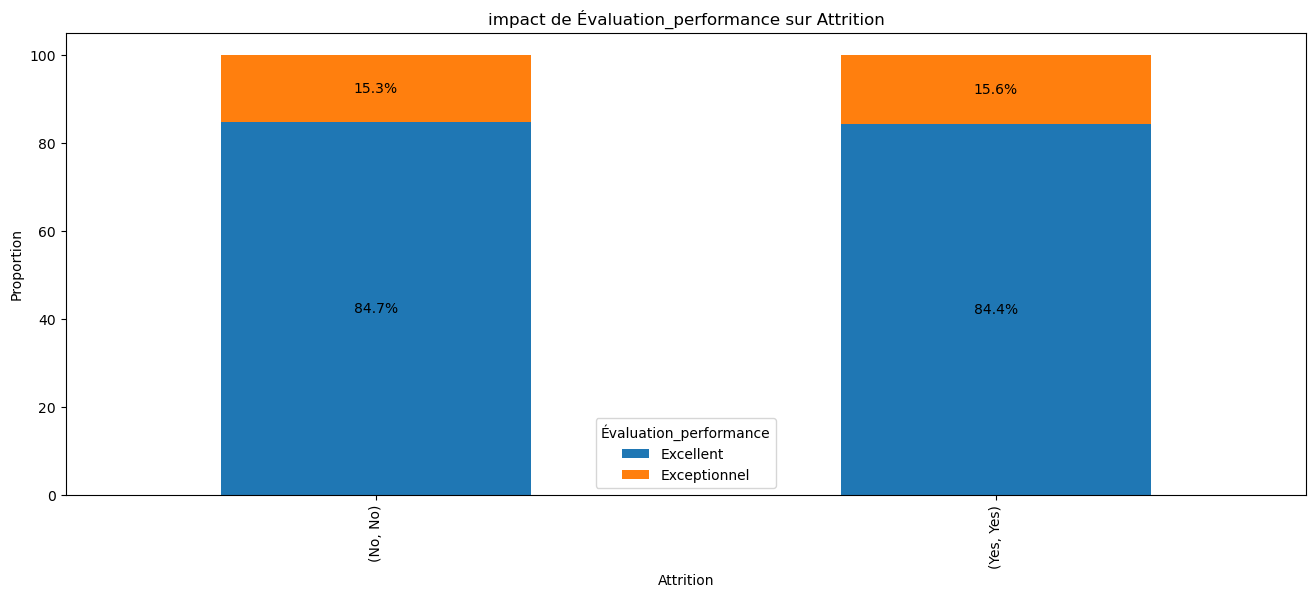

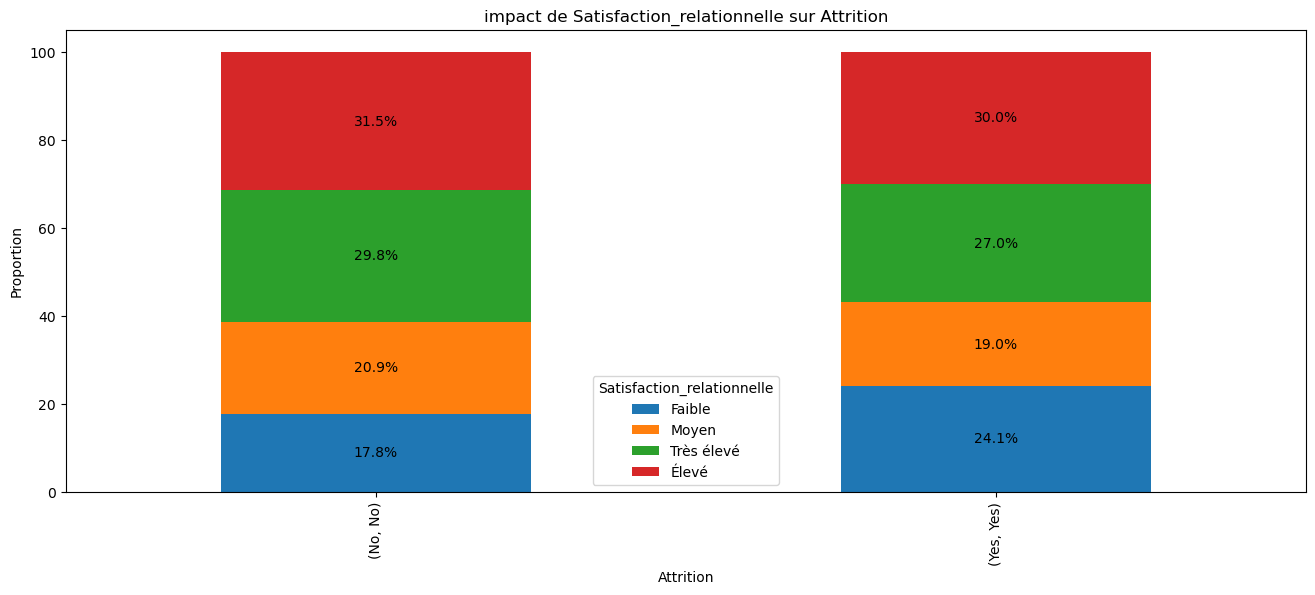

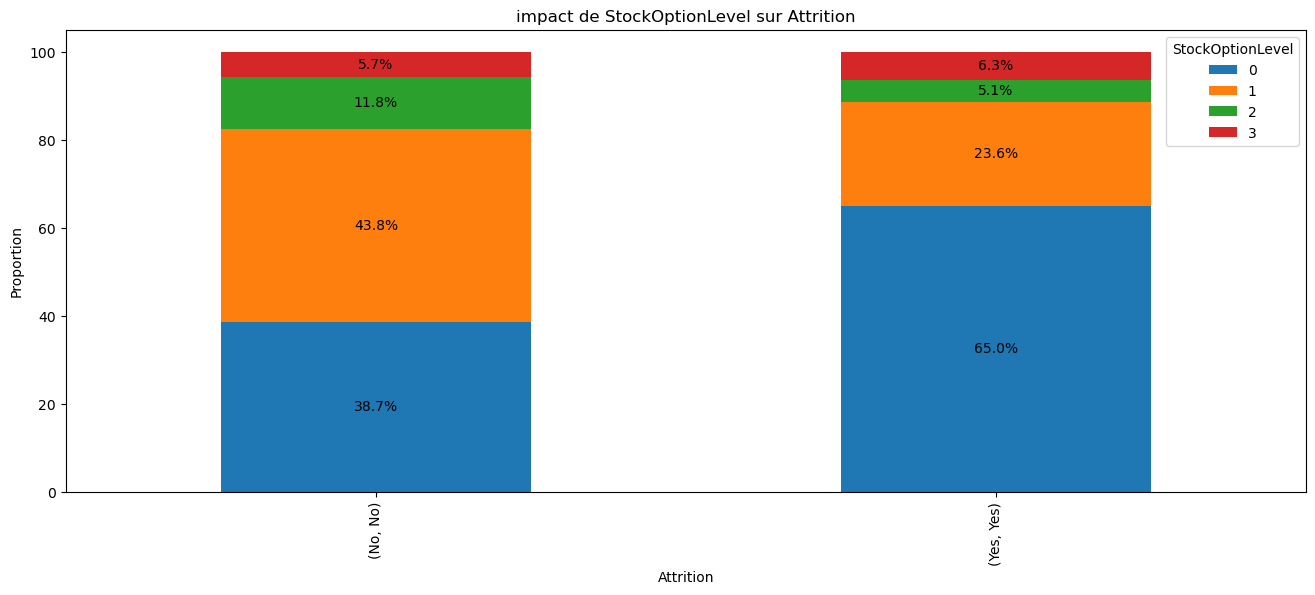

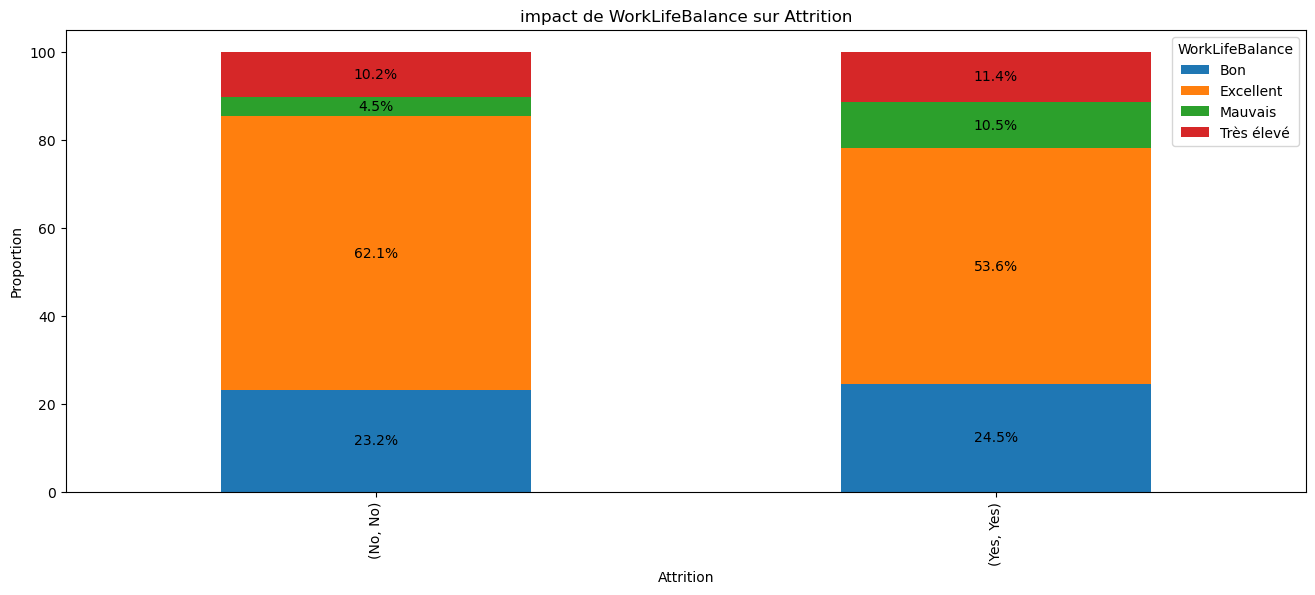

In [223]:
for col in Qualitative:
    if col!="Attrition":
        group_pour=base.groupby(["Attrition", col]).size().groupby(level=0).apply(lambda x: 100*x/x.sum())
        fig, ax=plt.subplots(figsize=(16,6))
        group_pour.unstack().plot(kind="bar", stacked=True, ax=ax)
        #Ajout des étiquettes
        ax.set_xlabel("Attrition")
        ax.set_ylabel("Proportion")
        plt.title("impact de"+ " "+ col+" "+"sur"+ " "+ "Attrition")
        #Ajout des pourcentages sur les bar
        for p in ax.patches:
            width=p.get_width()
            height=p.get_height()
            x, y=p.get_xy()
            ax.annotate(f'{height:.1f}%', (x+width/2, y+height/2), ha="center", va="center")


Test Statistique voir l'existence de liaison supconner  entre les variables Qualitatives et la variable Target:Attrition

TEST DE KHI DEUX

In [224]:
from scipy.stats import chi2_contingency

In [225]:
code={}
var_qualitative_importante = []
var_qualitative_nonimportante = []
for col in Qualitative:
    chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(base["Attrition"],df1[col]))
    code[col]=p_value
    if p_value<0.05:
        var_qualitative_importante.append(col)
    else:
        var_qualitative_nonimportante.append(col)
        
print("variables qualitatives qui sont liées avec la variable attrition au seuil de 5%  sont:")
print(  )
print(var_qualitative_importante)
print("---------------------------")
print("variables qualitatives qui ne sont pas liées au seui de 5 % avec la variable Attrition sont:")
print( )
print(var_qualitative_nonimportante)


variables qualitatives qui sont liées avec la variable attrition au seuil de 5%  sont:

['Attrition', 'Voyage_affaires', 'Department', 'EducationField', 'EnvironmentSatisfaction', 'Implication_dans_emploi', 'JobLevel', 'JobRole', 'Satisfaction_travail', 'État_civil', 'Heures_supplémentaires', 'StockOptionLevel', 'WorkLifeBalance']
---------------------------
variables qualitatives qui ne sont pas liées au seui de 5 % avec la variable Attrition sont:

['Education', 'Genre\xa0', 'Évaluation_performance', 'Satisfaction_relationnelle']


In [226]:
for col in Qualitative:
        if col!="Attrition":
            chi2, p_value, dof, expected=chi2_contingency(pd.crosstab(df1["Attrition"], df1[col]))
            code[col]=[p_value, expected]
            contingency_table=pd.crosstab(base["Attrition"], base[col])
            n=contingency_table.sum().sum()
            

            phi_cramer=np.sqrt(chi2/(n*(min(contingency_table.shape)-1)))
            print("v de cramer entre"+ " "+col+" "+"et" +" "+"Attrition")
            print(phi_cramer)
            print("----------------------------------------------")

v de cramer entre Voyage_affaires et Attrition
0.12825997643406717
----------------------------------------------
v de cramer entre Department et Attrition
0.0856984402909795
----------------------------------------------
v de cramer entre Education et Attrition
0.04572887712247177
----------------------------------------------
v de cramer entre EducationField et Attrition
0.10440851908182987
----------------------------------------------
v de cramer entre EnvironmentSatisfaction et Attrition
0.12372858554725893
----------------------------------------------
v de cramer entre Genre  et Attrition
0.027565224125453088
----------------------------------------------
v de cramer entre Implication_dans_emploi et Attrition
0.13922042727457964
----------------------------------------------
v de cramer entre JobLevel et Attrition
0.2221248853650073
----------------------------------------------
v de cramer entre JobRole et Attrition
0.24214215996065436
------------------------------------------


#### Nous allons enlever toutes les varibales dont le v cramer entre elle et la variable Attrition est inférieur à 0.1.
Par ailleurs , ce choix est basé aussi sur les differentes contributions des differentes variables dans le modèle de RandomForeest
On sais rendu compte que les variables ayant un v de cramer inferieur à 0.1 sont celles qui contribuent très faiblement à la formation du modèle RandomForest, et l'enlèvement de ces différentes variables dans le modèle à permi une amelioration legère des performances du modèles

In [227]:
#var_quanti_supprim=["HourlyRate","NumCompaniesWorked","PercentSalaryHike","TrainingTimesLastYear","YearsSinceLastPromotion"] 
var_quali_supprim=["Genre\xa0" ,"Department","Education","Évaluation_performance","Satisfaction_relationnelle","Heures_supplémentaires"]
Quantitative1=Quantitative
Qualitative1=Qualitative
for col in var_quali_supprim:
    Qualitative1.remove(col)


In [228]:
Quantitative1

['Age',
 'DailyRate',
 'HourlyRate',
 'Revenu_mensuel',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

In [229]:
Qualitative1

['Attrition',
 'Voyage_affaires',
 'EducationField',
 'EnvironmentSatisfaction',
 'Implication_dans_emploi',
 'JobLevel',
 'JobRole',
 'Satisfaction_travail',
 'État_civil',
 'StockOptionLevel',
 'WorkLifeBalance']

In [230]:
data_travail=data_travail[Quantitative1+Qualitative1]

## Traitement des Outliers 

In [231]:
def correction_des_outliers(df):
    for var in Quantitative:
        IQR = df[var].quantile(0.75) - df[var].quantile(0.25)
        lower = df[var].quantile(0.25) - (1.5*IQR)
        upper = df[var].quantile(0.75) + (1.5*IQR)
        df[var] = np.where(df[var]>upper,upper,
                           np.where(df[var]<lower,lower,df[var]))

In [232]:
correction_des_outliers(data_travail)

C:\Users\elias\AppData\Local\Temp\ipykernel_6952\3554248705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = np.where(df[var]>upper,upper,
C:\Users\elias\AppData\Local\Temp\ipykernel_6952\3554248705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var] = np.where(df[var]>upper,upper,
C:\Users\elias\AppData\Local\Temp\ipykernel_6952\3554248705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

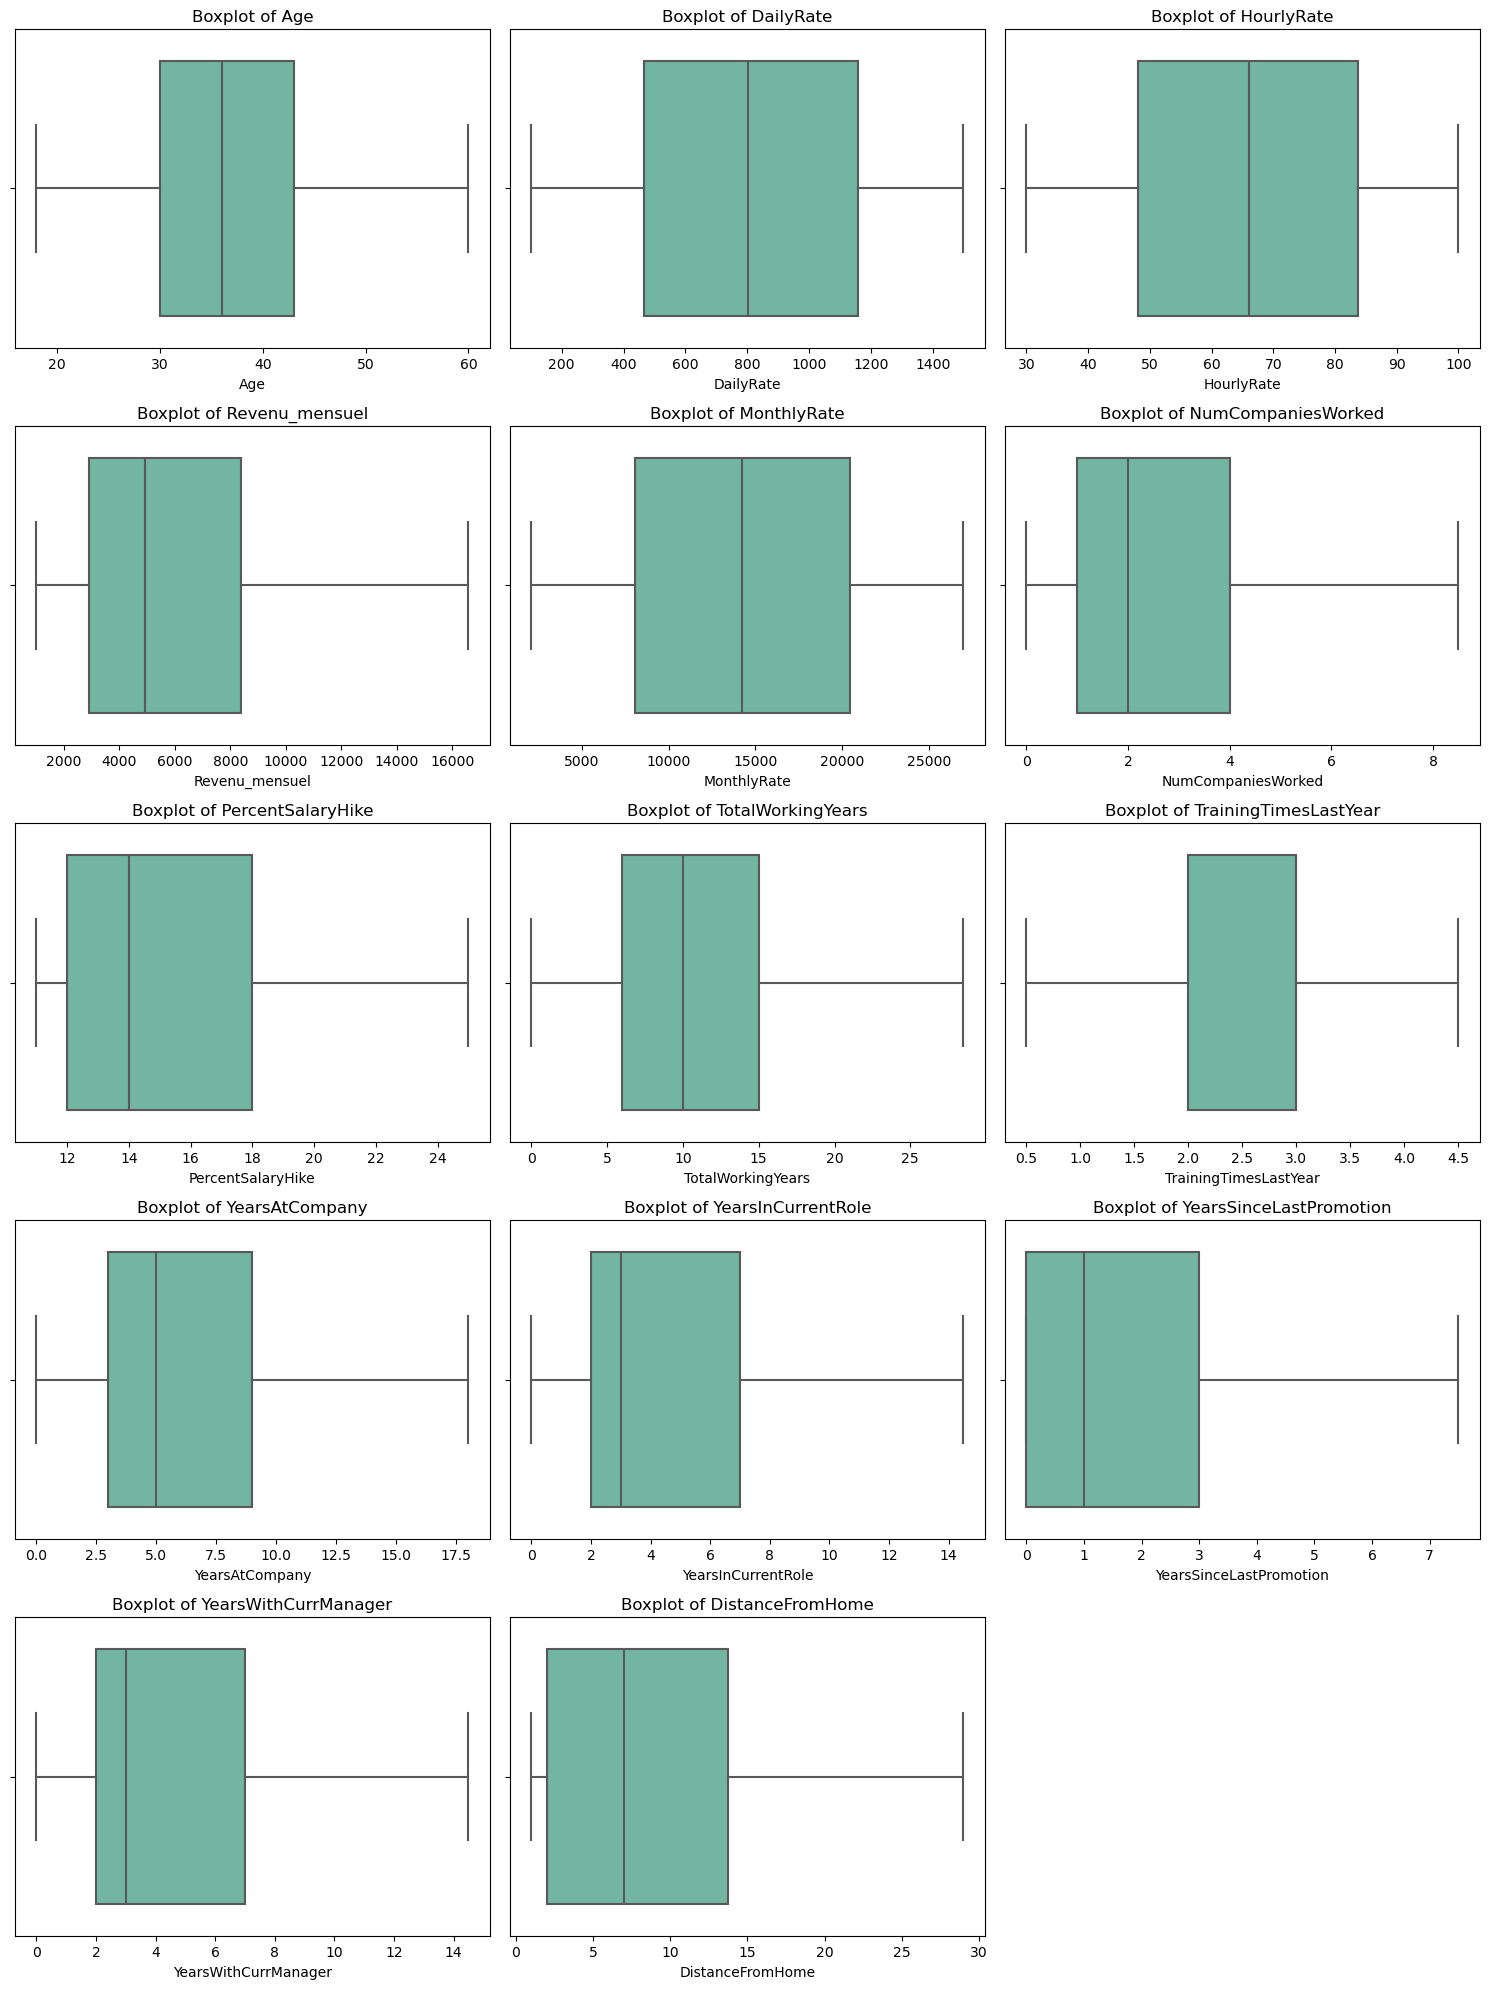

In [233]:
 plt.figure(figsize=(15,20))
for i, col in enumerate(Quantitative):
        ax = plt.subplot((len(Quantitative)//3)+1, 3, i+1)
        sns.boxplot(data=data_travail, x=col, ax=ax, palette='Set2')
        ax.set_title(f"Boxplot of {col}")
plt.tight_layout()

Commentaire :

    On observe bien que tous les outliers ont été traités

 ### Normalisations des variables Quantitatives

Pour la normalisations des différentes variables Quantitatives , etant donné que le modèle de RandomForest ne se base pas sur les distances , nous allons la normaliser la base lorsque nous vouloir faire le KNN qui est un modèle  qui fait intervenir les distances

# Encodages des Variables Categorielles

Etant donné que ce sont des variables qualitatives nominales , Nous allons les duminiser

Separation des variables qualitatives binaires et les autres variables categrielles nominales

In [234]:
data_travail["Attrition"]=data_travail["Attrition"].apply(lambda row:1 if row=="Yes" else 0)


C:\Users\elias\AppData\Local\Temp\ipykernel_6952\2662640864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_travail["Attrition"]=data_travail["Attrition"].apply(lambda row:1 if row=="Yes" else 0)


In [235]:
data_travail.columns

Index(['Age', 'DailyRate', 'HourlyRate', 'Revenu_mensuel', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome',
       'Attrition', 'Voyage_affaires', 'EducationField',
       'EnvironmentSatisfaction', 'Implication_dans_emploi', 'JobLevel',
       'JobRole', 'Satisfaction_travail', 'État_civil', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')

In [236]:
base_Qualitatitve=data_travail[Qualitative]

In [237]:

binary_column=[]
for col in data_travail.select_dtypes("object"):
    if len(data_travail[col].unique())<3:
        binary_column.append(col)
    
#binary_column=base_Qualitatitve.drop("Attrition", axis=1).nunique()[base_Qualitatitve.drop("Attrition", axis=1).nunique()<3].keys().to_list()

In [238]:
binary_column

[]

In [239]:
for col in binary_column:
    #if col in data_travail.select_dtypes("object"):
            u=data_travail[col].unique()
            code={}
            code[u[0]]=0
            code[u[1]]=1
            data_travail.loc[:, col]=data_travail[col].map(code)

In [240]:
var_caegorielles_restantes=[]
for col in data_travail.select_dtypes("object"):
    var_caegorielles_restantes.append(col)
print(var_caegorielles_restantes)


['Voyage_affaires', 'EducationField', 'JobRole', 'État_civil']


In [241]:
data_final=pd.get_dummies(data=data_travail, columns=var_caegorielles_restantes,drop_first=True)

In [242]:
data_final

Age  DailyRate  HourlyRate  Revenu_mensuel  MonthlyRate  \
0     41.0     1102.0        94.0          5993.0      19479.0   
1     49.0      279.0        61.0          5130.0      24907.0   
2     37.0     1373.0        92.0          2090.0       2396.0   
3     33.0     1392.0        56.0          2909.0      23159.0   
4     27.0      591.0        40.0          3468.0      16632.0   
...    ...        ...         ...             ...          ...   
1465  36.0      884.0        41.0          2571.0      12290.0   
1466  39.0      613.0        42.0          9991.0      21457.0   
1467  27.0      155.0        87.0          6142.0       5174.0   
1468  49.0     1023.0        63.0          5390.0      13243.0   
1469  34.0      628.0        82.0          4404.0      10228.0   

      NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                    8.0               11.0                8.0   
1                    1.0               23.0               10.0   
2                    6.0               15.0                7.0   
3                    1.0               11.0                8.0   
4                    8.5               12.0                6.0   
...                  ...                ...                ...   
1465                 4.0               17.0               17.0   
1466                 4.0               15.0                9.0   
1467                 1.0               20.0                6.0   
1468                 2.0               14.0               17.0   
1469                 2.0               12.0                6.0   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                       0.5             6.0                 4.0   
1                       3.0            10.0                 7.0   
2                       3.0             0.0                 0.0   
3                       3.0             8.0                 7.0   
4                       3.0             2.0                 2.0   
...                     ...             ...                 ...   
1465                    3.0             5.0                 2.0   
1466                    4.5             7.0                 7.0   
1467                    0.5             6.0                 2.0   
1468                    3.0             9.0                 6.0   
1469                    3.0             4.0                 3.0   

      YearsSinceLastPromotion  YearsWithCurrManager  DistanceFromHome  \
0                         0.0                   5.0               1.0   
1                         1.0                   7.0               8.0   
2                         0.0                   0.0               2.0   
3                         3.0                   0.0               3.0   
4                         2.0                   2.0               2.0   
...                       ...                   ...               ...   
1465                      0.0                   3.0              23.0   
1466                      1.0                   7.0               6.0   
1467                      0.0                   3.0               4.0   
1468                      0.0                   8.0               2.0   
1469                      1.0                   2.0               8.0   

      Attrition  EnvironmentSatisfaction  Implication_dans_emploi  JobLevel  \
0             1                        2                        3         2   
1             0                        3                        2         2   
2             1                        4                        2         1   
3             0                        4                        3         1   
4             0                        1                        3         1   
...         ...                      ...                      ...       ...   
1465          0                        3                        4         2   
1466          0                        4                        2         3   
1467          0             

In [243]:
data_final["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [244]:
Y=data_final["Attrition"]
X=data_final.drop("Attrition", axis=1)

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

# Random Forest

In [246]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [247]:
rfc=RandomForestClassifier(random_state=0)

In [248]:
#n_estimators = [int(x) for x in np.linspace(2, 80,5)]
n_estimators=[ int(x) for x in range(11, 20,1)]
#n_estimators=[200,300]
max_features = ['auto', 'sqrt', "log2"]
max_depth = [11,13, 14,15]
#min_samples_split = [2,5]
#min_samples_leaf = [1, 2]
criterion = ['gini', 'entropy']
bootstrap = [True, False]

In [249]:
params_grid = {'n_estimators': n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap,
              }
print(params_grid)
#

{'n_estimators': [11, 12, 13, 14, 15, 16, 17, 18, 19], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [11, 13, 14, 15], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]}


In [250]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params_grid, cv=4)


In [251]:
CV_rfc.fit(X_train, y_train)

c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [11, 12, 13, 14, 15, 16, 17, 18, 19]})

In [252]:
CV_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 11}

In [253]:
CV_rfc.best_score_

0.8590818792496109

In [254]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import learning_curve



        Slection des meilleurs variables pour la prediction

In [255]:
preprocessor=make_pipeline(SelectKBest(f_classif,k=20
                                      ))

In [256]:
#

rf_Model =make_pipeline(preprocessor,RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_depth= 14,
 max_features= 'auto',
 n_estimators= 14))

#min_samples_leaf=1,
#         min_samples_split=5,
    

In [257]:
rf_Model.fit(X_train, y_train)

c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest', SelectKBest(k=20))])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=14,
                                        max_features='auto',
                                        n_estimators=14))])

In [258]:
def evaluation (model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    print(CM)
    N, train_score, val_score=learning_curve(model, X_train, y_train, 
                                             cv=4, scoring="f1" ,train_sizes=np.linspace(0.1, 1, 5))
    plt.figure(figsize=(12, 8))
    plt.plot(N,train_score.mean(axis=1), label="train_score")
    plt.plot(N,val_score.mean(axis=1), label="Validation_score")
    
    plt.legend()

c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8054298642533937
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       182
           1       0.30      0.08      0.12        39

    accuracy                           0.81       221
   macro avg       0.56      0.52      0.51       221
weighted avg       0.74      0.81      0.76       221

[[175   7]
 [ 36   3]]


c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

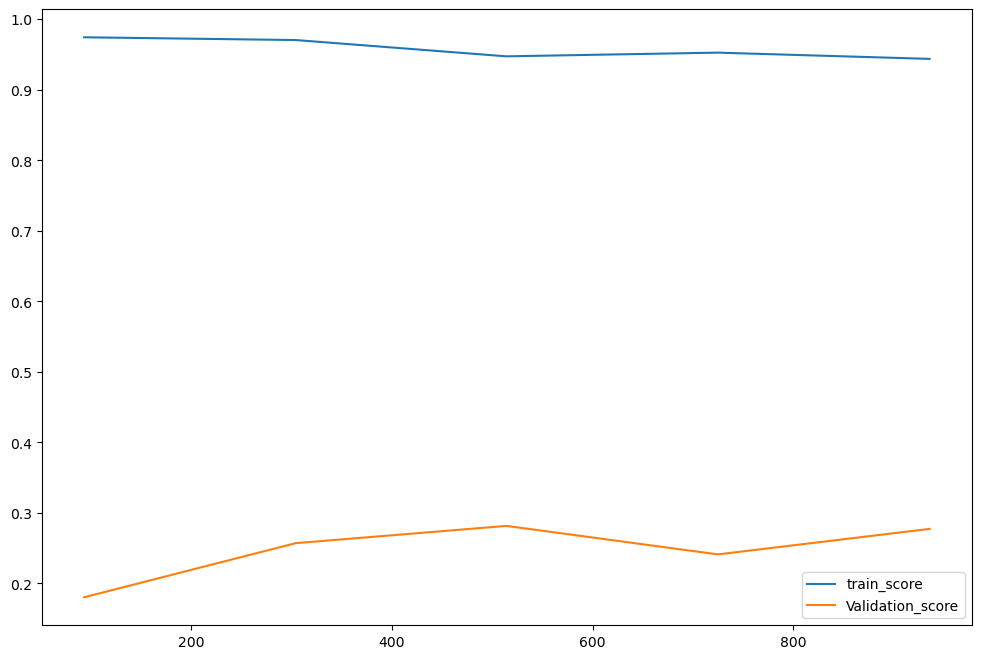

In [259]:
evaluation(rf_Model)


Commentaire: 

Le modèle est en Overfiting:

Cause principal supconner:la taiblle des données semblent etre faibles
    
En effet la Validation_score augmente a mesure que la taille du X_train augmente

## Visualisons les contributions de chaque variable dans le  modèle

In [261]:
#plt.figure()
#pd.DataFrame(rf_Model.feature_importances_, X_train.columns).plot.bar(figsize=(15,6))

In [93]:
from sklearn import tree
from sklearn import metrics

Modl = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred_proba = rf_Model.predict_proba(X_test)[::,1]
AUC = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC is", AUC)

AUC is 0.6982248520710059


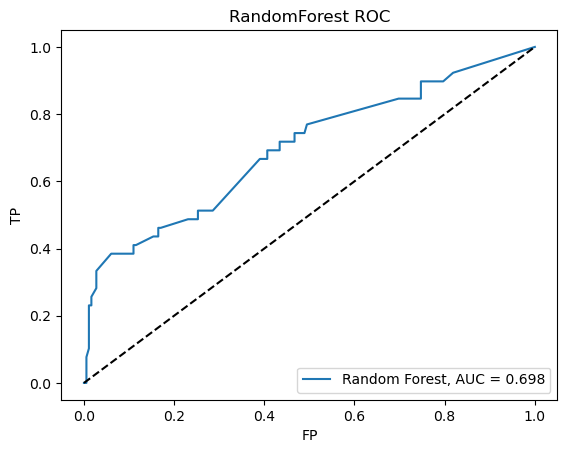

In [94]:
# ROC Curve
#NB:Cette partie a été realisé avant l'insertion de make_pipeline
from sklearn import metrics
y_pred_proba = rf_Model.predict_proba(X_test)[::, 1]
fp, tp, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fp, tp, label = "Random Forest, AUC = {:.3f}".format(AUC))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('RandomForest ROC')
plt.legend(loc=4)
plt.show()

### Random Forest avec la base Equlibré 

l'object de cette sous partie est de voir si la realisation du RandomForest avec une 
base de données Equilibré peut améliorer la performance du modèle

In [95]:
demis=data_final[data_final["Attrition"]==1]
non_demis=data_final[data_final["Attrition"]==0]

In [96]:
import random

In [97]:
random_indices=random.sample(range(non_demis.shape[0]), 237)

In [98]:
non_demis_ech=non_demis.iloc[random_indices]

In [99]:
data_reechell=pd.concat([demis, non_demis], axis=0)

In [100]:
Y_E=data_reechell["Attrition"]
X_E=data_reechell.drop("Attrition", axis=1)

In [101]:
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X_E, Y_E, test_size=0.05)

In [102]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params_grid, cv=4)

In [103]:
CV_rfc.fit(X_train_E, y_train_E)

c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\elias\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [11, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [11, 12, 13, 14, 15, 16, 17, 18, 19]})

In [104]:
CV_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 18}

In [105]:
CV_rfc.best_score_

0.8631805157593123

In [106]:
preprocessor=make_pipeline(SelectKBest(f_classif,k=23))

In [107]:
rf_Model2=make_pipeline(preprocessor,RandomForestClassifier(bootstrap=False,
         criterion= "gini",
         max_depth=11,
         max_features='log2',
         n_estimators=13, random_state=0))


In [108]:
rf_Model2.fit(X_train_E, y_train_E)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest', SelectKBest(k=23))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, max_depth=11,
                                        max_features='log2', n_estimators=13,
                                        random_state=0))])

In [109]:
def evaluation2 (model):
    model.fit(X_train_E, y_train_E)
    y_pred = model.predict(X_test_E)
    CM = confusion_matrix(y_test_E, y_pred)
    print(accuracy_score(y_test_E, y_pred))
    print(classification_report(y_test_E,y_pred))
    print(CM)
    N, train_score, val_score=learning_curve(model, X_train, y_train, 
                                             cv=4, scoring="f1" ,train_sizes=np.linspace(0.1, 1, 5))
    plt.figure(figsize=(12, 8))
    plt.plot(N,train_score.mean(axis=1), label="train_score")
    plt.plot(N,val_score.mean(axis=1), label="Validation_score")
    
    plt.legend()

0.8235294117647058
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       182
           1       0.50      0.21      0.29        39

    accuracy                           0.82       221
   macro avg       0.67      0.58      0.60       221
weighted avg       0.79      0.82      0.79       221

[[174   8]
 [ 31   8]]


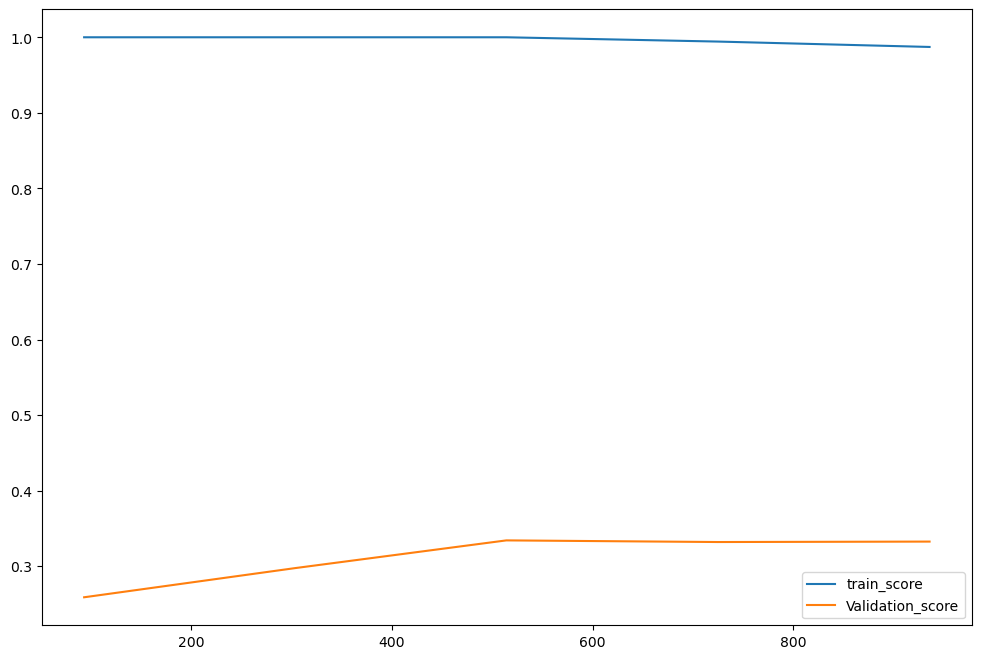

In [110]:
evaluation(rf_Model2)

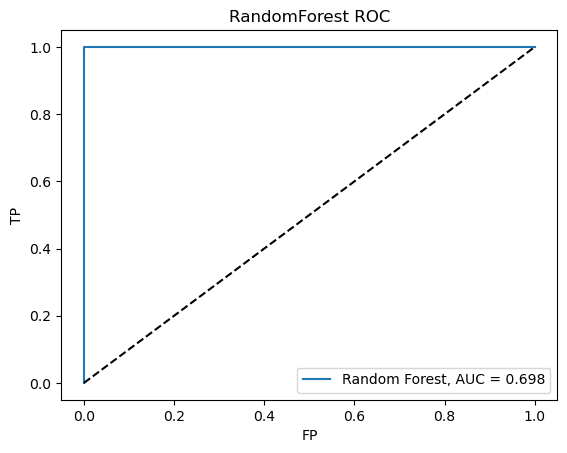

In [111]:

y_pred_proba = rf_Model.predict_proba(X_test_E)[::, 1]
fp, tp, _ = metrics.roc_curve(y_test_E, y_pred_proba)
plt.plot(fp, tp, label = "Random Forest, AUC = {:.3f}".format(AUC))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('RandomForest ROC')
plt.legend(loc=4)
plt.show()

#            KNeigborsClassifier
            

Dans cette sous partie nous allons normaliser les données avant de les inserer dans le modèle.En effet KNN est un modèle qui se base sur les distances, ainsi il est important de normaliser les données pour palier aux problèmes d'unités, vu que les variables Quantitatives ne sont pas exprimées dans les memes unités


In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler()
#scaler=MinMaxScaler(feature_range=(0,1))

In [113]:
data_final[Quantitative]=scaler.fit_transform(data_final[Quantitative])

In [114]:
data_final

Age  DailyRate  HourlyRate  Revenu_mensuel  MonthlyRate  \
0     0.446350   0.742527    1.383138       -0.084766     0.726020   
1     1.322365  -1.297775   -0.240677       -0.283072     1.488876   
2     0.008343   1.414363    1.284725       -0.981623    -1.674841   
3    -0.429664   1.461466   -0.486709       -0.793428     1.243211   
4    -1.086676  -0.524295   -1.274014       -0.664977     0.325900   
...        ...        ...         ...             ...          ...   
1465 -0.101159   0.202082   -1.224807       -0.871096    -0.284329   
1466  0.227347  -0.469754   -1.175601        0.833920     1.004010   
1467 -1.086676  -1.605183    1.038693       -0.050528    -1.284418   
1468  1.322365   0.546677   -0.142264       -0.223328    -0.150393   
1469 -0.320163  -0.432568    0.792660       -0.449897    -0.574124   

      NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0               2.169877          -1.150554          -0.424999   
1              -0.682817           2.129306          -0.151076   
2               1.354822          -0.057267          -0.561960   
3              -0.682817          -1.150554          -0.424999   
4               2.373641          -0.877232          -0.698921   
...                  ...                ...                ...   
1465            0.539766           0.489376           0.807651   
1466            0.539766          -0.057267          -0.288038   
1467           -0.682817           1.309341          -0.698921   
1468           -0.275289          -0.330589           0.807651   
1469           -0.275289          -0.877232          -0.698921   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                 -2.130765       -0.123832           -0.058474   
1                  0.278639        0.678078            0.785616   
2                  0.278639       -1.326697           -1.183926   
3                  0.278639        0.277123            0.785616   
4                  0.278639       -0.925742           -0.621200   
...                     ...             ...                 ...   
1465               0.278639       -0.324310           -0.621200   
1466               1.724281        0.076645            0.785616   
1467              -2.130765       -0.123832           -0.621200   
1468               0.278639        0.477600            0.504253   
1469               0.278639       -0.524787           -0.339837   

      YearsSinceLastPromotion  YearsWithCurrManager  DistanceFromHome  \
0                   -0.776139              0.253823         -1.010406   
1                   -0.372486              0.822605         -0.139702   
2                   -0.776139             -1.168130         -0.886019   
3                    0.434819             -1.168130         -0.761633   
4                    0.031166             -0.599348         -0.886019   
...                       ...                   ...               ...   
1465                -0.776139             -0.314958          1.726092   
1466                -0.372486              0.822605         -0.388474   
1467                -0.776139             -0.314958         -0.637247   
1468                -0.776139              1.106995         -0.886019   
1469                -0.372486             -0.599348         -0.139702   

      Attrition  EnvironmentSatisfaction  Implication_dans_emploi  JobLevel  \
0             1                        2                        3         2   
1             0                        3                        2         2   
2             1                        4                        2         1   
3             0                        4                        3         1   
4             0                        1                        3         1   
...         ...                      ...                      ...       ...   
1465          0                        3                        4         2   
1466          0                        4                       

In [115]:
Y=data_final["Attrition"]
X=data_final.drop("Attrition", axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [117]:
X_train=PolynomialFeatures(2).fit_transform(X_train)
X_test=PolynomialFeatures(2).fit_transform(X_test)

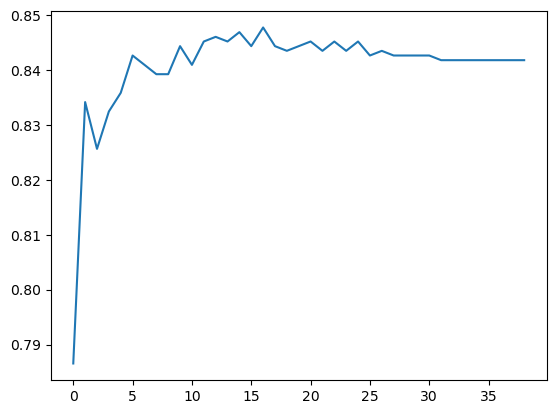

In [118]:
#make_pipeline(preprocessor,StandardScaler(),

val_score=[]
for k in range (1, 40):#On fait varier l'hyperparamètre n_neighbors de 1 à 40
    score=cross_val_score( KNeighborsClassifier(n_neighbors=k),  X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

In [119]:
para_grid = {'n_neighbors': np.arange(1, 15), 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [120]:
grid=GridSearchCV(KNeighborsClassifier(), para_grid,cv=6)

In [121]:
grid.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [122]:
grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 7}

In [123]:
grid.best_score_

0.8537414965986394

In [124]:
model_Kneig=grid.best_estimator_
#KNeighborsClassifier(metric= 'manhattan', n_neighbors=6)

In [125]:
model_Kneig.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [126]:
#model_Kneig.score(x_test_scaled, y_test)
model_Kneig.score(X_test, y_test)

0.8435374149659864

In [127]:
def evaluation1 (model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    print(CM)
    N, train_score, val_score=learning_curve(model, X_train
                                             , y_train, 
                                             cv=4, scoring="f1" ,train_sizes=np.linspace(0.1, 1, 5))
    plt.figure(figsize=(12, 8))
    plt.plot(N,train_score.mean(axis=1), label="train_score")
    plt.plot(N,val_score.mean(axis=1), label="Validation_score")
    
    plt.legend()

0.8435374149659864
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       243
           1       0.78      0.14      0.23        51

    accuracy                           0.84       294
   macro avg       0.81      0.56      0.57       294
weighted avg       0.83      0.84      0.79       294

[[241   2]
 [ 44   7]]


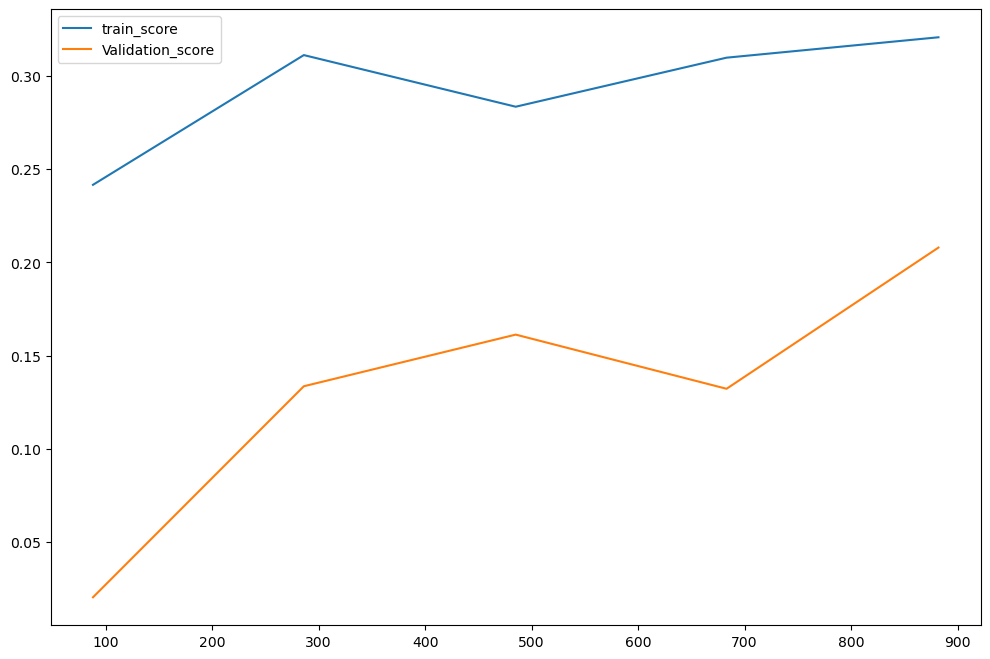

In [128]:
evaluation1(model_Kneig)

Au du graphiue ci dessus, il est clair que le modèle a mal appris , mais nous avons essayé 
d'ameliorer le modèle mais nous nous sommes pas parvenu

In [129]:
from sklearn import tree

Modl = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred_proba = model_Kneig.predict_proba(X_test)[::,1]
AUC = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC is", AUC)

AUC is 0.686556927297668


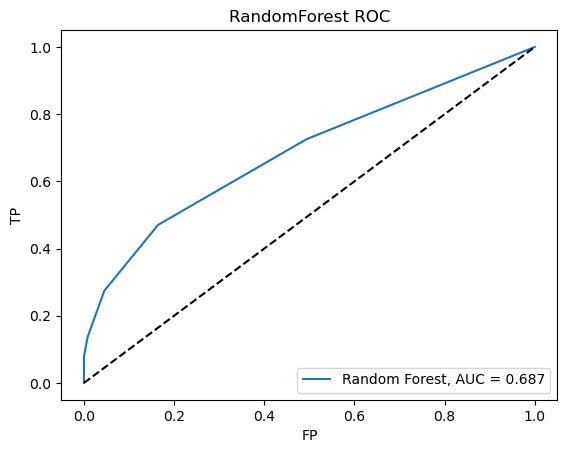

In [130]:

y_pred_proba = model_Kneig.predict_proba(X_test)[::, 1]
fp, tp, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fp, tp, label = "Random Forest, AUC = {:.3f}".format(AUC))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP')
plt.ylabel('TP')
plt.title('RandomForest ROC')
plt.legend(loc=4)
plt.show()

## KNN

Avec les données Equilibrée

l'objectif de cette sous partie est voir si le KNN realisée avec une base equilibrée à des bonnes performances 
avec le modèle realisé avec la base de donnée desequiibrée

In [131]:
from sklearn.preprocessing import PolynomialFeatures

In [132]:
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(X_E, Y_E, 
                                                            test_size=0.1
                                                        )

In [133]:
X_train_E=PolynomialFeatures(2).fit_transform(X_train_E)
X_test_E=PolynomialFeatures(2).fit_transform(X_test_E)

In [134]:
scaler.fit(X_train_E)

StandardScaler()

In [135]:
x_train_scaled_E=scaler.transform(X_train_E)

In [136]:
scaler.fit(X_test_E)

StandardScaler()

In [137]:
x_test_scaled_E=scaler.transform(X_test_E)

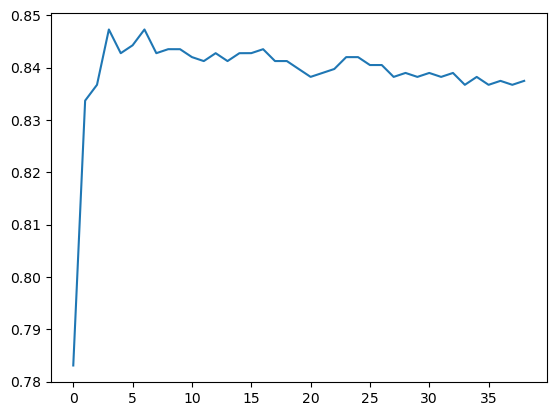

In [138]:

val_score=[]
for k in range (1, 40):#On fait varier l'hyperparamètre n_neighbors de 1 à 40
    score=cross_val_score( KNeighborsClassifier(n_neighbors=k),  x_train_scaled_E, y_train_E, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

In [139]:
para_grid = {'n_neighbors': np.arange(1, 15), 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [140]:
grid=GridSearchCV(KNeighborsClassifier(), para_grid,cv=5)

In [141]:
grid.fit(x_train_scaled_E,y_train_E)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [142]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [143]:
grid.best_score_

0.8541252144082334

In [144]:
model_Kneig_E=grid.best_estimator_

In [145]:
model_Kneig_E.fit(x_train_scaled_E,y_train_E)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [146]:
model_Kneig_E.score(x_test_scaled_E, y_test_E)

0.8571428571428571

In [147]:
def evaluation3 (model):
    model.fit(x_train_scaled_E, y_train_E)
    y_pred_E = model.predict(x_test_scaled_E)
    CM = confusion_matrix(y_test_E, y_pred_E)
    print(accuracy_score(y_test_E, y_pred_E))
    print(classification_report(y_test_E,y_pred_E))
    print(CM)
    N, train_score, val_score=learning_curve(model, x_train_scaled_E
                                             , y_train_E, 
                                             cv=4, scoring="f1" ,train_sizes=np.linspace(0.1, 1, 5))
    plt.figure(figsize=(12, 8))
    plt.plot(N,train_score.mean(axis=1), label="train_score")
    plt.plot(N,val_score.mean(axis=1), label="Validation_score")
    
    plt.legend()

0.8571428571428571
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       130
           1       0.17      0.06      0.09        17

    accuracy                           0.86       147
   macro avg       0.53      0.51      0.50       147
weighted avg       0.80      0.86      0.83       147

[[125   5]
 [ 16   1]]


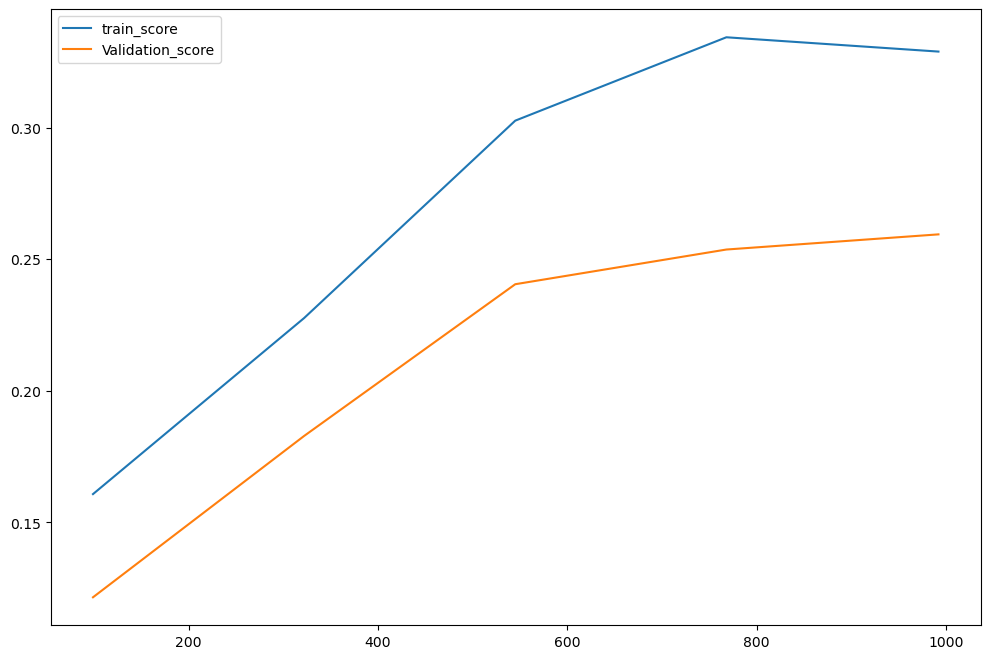

In [148]:
evaluation3(model_Kneig_E)

In [262]:
import joblib
joblib.dump(rf_Model,"finalmodel.joblib")

['final_model.joblib']

In [153]:
data_travail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   float64
 1   DailyRate                1470 non-null   float64
 2   HourlyRate               1470 non-null   float64
 3   Revenu_mensuel           1470 non-null   float64
 4   MonthlyRate              1470 non-null   float64
 5   NumCompaniesWorked       1470 non-null   float64
 6   PercentSalaryHike        1470 non-null   float64
 7   TotalWorkingYears        1470 non-null   float64
 8   TrainingTimesLastYear    1470 non-null   float64
 9   YearsAtCompany           1470 non-null   float64
 10  YearsInCurrentRole       1470 non-null   float64
 11  YearsSinceLastPromotion  1470 non-null   float64
 12  YearsWithCurrManager     1470 non-null   float64
 13  DistanceFromHome         1470 non-null   float64
 14  Attrition               

In [154]:
data_travail.columns

Index(['Age', 'DailyRate', 'HourlyRate', 'Revenu_mensuel', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome',
       'Attrition', 'Voyage_affaires', 'EducationField',
       'EnvironmentSatisfaction', 'Implication_dans_emploi', 'JobLevel',
       'JobRole', 'Satisfaction_travail', 'État_civil',
       'Heures_supplémentaires', 'StockOptionLevel', 'WorkLifeBalance'],
      dtype='object')

In [156]:
data_travail_cat=data_travail.select_dtypes("object")

In [157]:
data_travail_cat

Voyage_affaires EducationField                    JobRole État_civil  \
0         Travel_Rarely  Life Sciences            Sales Executive     Single   
1     Travel_Frequently  Life Sciences         Research Scientist    Married   
2         Travel_Rarely          Other      Laboratory Technician     Single   
3     Travel_Frequently  Life Sciences         Research Scientist    Married   
4         Travel_Rarely        Medical      Laboratory Technician    Married   
...                 ...            ...                        ...        ...   
1465  Travel_Frequently        Medical      Laboratory Technician    Married   
1466      Travel_Rarely        Medical  Healthcare Representative    Married   
1467      Travel_Rarely  Life Sciences     Manufacturing Director    Married   
1468  Travel_Frequently        Medical            Sales Executive    Married   
1469      Travel_Rarely        Medical      Laboratory Technician    Married   

     Heures_supplémentaires  
0                         0  
1                         1  
2                         0  
3                         0  
4                         1  
...                     ...  
1465                      1  
1466                      1  
1467                      0  
1468                      1  
1469                      1  

[1470 rows x 5 columns]

In [159]:
data_travail_cat["Voyage_affaires"].value_counts()

Voyage_affaires
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [164]:
data_travail_cat["EducationField"].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [165]:
data_travail_cat["JobRole"].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [166]:
data_travail_cat["État_civil"].value_counts()

État_civil
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [167]:
data_travail_cat["Heures_supplémentaires"].value_counts()

Heures_supplémentaires
1    1054
0     416
Name: count, dtype: int64

In [266]:
Age=30
DailyRate=500
HourlyRate=100
Revenu_mensuel=100
MonthlyRate=300
NumCompaniesWorked=5
PercentSalaryHike=6
TotalWorkingYears=17
TrainingTimesLastYear=3
YearsAtCompany=14
YearsInCurrentRole=3
YearsSinceLastPromotion=3
YearsWithCurrManager=3
DistanceFromHome=3

#Voyage_affaires,
  
Voyage_affaires="Non-Travel"
#EducationField,EducationField,Jobrole,État_civil,Heures_supplémentaires     
Educa=["Life Sciences","Medical","Marketing","Technical Degree","Other","Human Resources"]
EducationField="Life Sciences"
#JobRole
Job=["Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager",
     "Sales Representative","Research Director","Human Resources"]
JobRole="Sales Representative"
#État_civil
Etatcivil=["Married","Single","Divorced"]

État_civil="Married"

data=np.array([[Age,DailyRate,HourlyRate,Revenu_mensuel,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,
              TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Voyage_affaires,EducationField,JobRole,État_civil]])
new_data=pd.DataFrame(data.reshape(1,18), columns=["Age","DailyRate","HourlyRate","Revenu_mensuel","MonthlyRate","NumCompaniesWorked","PercentSalaryHike","TotalWorkingYears",
              "TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","DistanceFromHome","Voyage_affaires","EducationField","JobRole","État_civil"])